# IMPORTS

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics.SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *

import os
from Utils import cacheOnDisk
from SegalQueue.qp import qp,fakeqp
from addloglevels import sethandlers

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate


'25092018'

# arrange cardio phenotipic data:

In [ ]:
#load the phenotype file for cardio samples:
f1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/medical_relevant_features_156x7.csv'          
CardioPhen = pd.read_csv(f1)
CardioPhen.head()

In [ ]:
#load Cardio126 sample list:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
Cardio126 [:5]

In [ ]:
#load BD SAMPLE FILE:
f1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/updatedBDandFDlists/BDfile_31052018.xlsx'          
BDfile = pd.read_excel(f1)
BDfile.head()

In [ ]:
BDfile_small=BDfile[['DnaID','corrected_regCode']]
print len(BDfile_small)
BDfile_small=BDfile_small.drop_duplicates()
BDfile_small=BDfile_small.rename(columns={'DnaID':'BD'})
BDfile_small.head()
print len(BDfile_small)

In [ ]:
cardio126regs=BDfile_small[BDfile_small['BD'].isin(Cardio126)]
print len(cardio126regs)

In [ ]:
# get the phenotypic data only for Cardio126 samples and index by BD:
Cardio126phen=pd.merge(cardio126regs,CardioPhen,how='left', left_on='corrected_regCode',right_on='RegistrationCode')
print len(Cardio126phen)
Cardio126phen.head()

In [ ]:
# Cardio126phen=Cardio126phen.set_index('BD')
Cardio126phen=Cardio126phen.drop('corrected_regCode',axis=1)
Cardio126phen.head()

In [ ]:
f1 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phen'          
Cardio126phen.to_pickle(f1)

f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phen.xlsx'          
Cardio126phen.to_excel(f2)

In [ ]:
# get phenotypic data only for cardio samples with at least 9000 sequences:
dfs_folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep1/SamplesForAnalysis_corrected' %MyPath
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
Cardio126ss9000list = [f.replace('_9000.tsv','') for f in filenames]
print len(Cardio126ss9000list)
Cardio126ss9000list[:5]

In [ ]:
#take only Cardio126ss9000 samples:

f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phen.xlsx'          
Cardio126phen=pd.read_excel(f2)
Cardio126phen=Cardio126phen.set_index('BD')
Cardio126phen.head()



In [ ]:
Cardio126ss9000_AgeGenderBMIcreatSmoking=Cardio126phen.loc[Cardio126ss9000list,:]
print len(Cardio126ss9000_AgeGenderBMIcreatSmoking)
Cardio126ss9000_AgeGenderBMIcreatSmoking.head()

In [ ]:
#save filtered file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_AgeGenderBMIcreatSmoking.xlsx' 
Cardio126ss9000_AgeGenderBMIcreatSmoking.to_excel(f1)

## Add new phenotypic data - 050918

to add new phenotype data or update existing:
1. edit Cardio126phen.xlsx file to include new samples if needed (BD, RegistrationCode are obligatory, Age is not obligatory but recommended to add manually as it won't be added by the code later.
2. use a file in the format of 'Medical_database_20-08-2018.xlsx' for updating: update the file name in the following code.
3. note the loop over the 'checklist' variables which update existing variables with info from the medical database if it is missing.


In [ ]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phen.xlsx' 
Cardio126phen=pd.read_excel(f1)
Cardio126phen.head()

In [ ]:
#load new phenotype data:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Medical_database_20-08-2018.xlsx'
Medical_database=pd.read_excel(f2)
Medical_database.head()

In [ ]:
Medical_database['BMI']=Medical_database['Weight (kg)']/((Medical_database['Height (cm)']/100)**2)

In [ ]:
Medical_database['BMI'].hist()
plt.show()

In [ ]:
import daytime 
import datetime

In [ ]:
Medical_database['Date of Birth'].head()

In [ ]:
#extract year of birth
Medical_database['year of Birth']=((Medical_database['Date of Birth'].astype(str)).str.split('-')).str[0]
Medical_database['year of Birth']=np.where(Medical_database['year of Birth'].str.contains('/'),
                                          ((Medical_database['year of Birth'].astype(str)).str.split('/')).str[2],
                                          Medical_database['year of Birth'])
Medical_database['year of Birth']=pd.to_numeric(Medical_database['year of Birth'], errors='coerce')

In [ ]:
#extract year admission
Medical_database['Admission Year']=((Medical_database['Admission Date'].astype(str)).str.split('-')).str[0]
Medical_database['Admission Year']=np.where(Medical_database['Admission Year'].str.contains('/'),
                                          ((Medical_database['Admission Year'].astype(str)).str.split('/')).str[2],
                                          Medical_database['Admission Year'])
Medical_database['Admission Year']=pd.to_numeric(Medical_database['Admission Year'], errors='coerce')
print Medical_database['Admission Year'].describe()

In [ ]:
Medical_database['Age']=Medical_database['Admission Year']-Medical_database['year of Birth']
print Medical_database['Age'].describe()

In [ ]:
print len(Medical_database)

In [ ]:
Medical_database.columns.values.tolist()

In [ ]:
interestingColumns=['RegistrationCode','Age','Creatinine','BMI','Smoking Status','Pack Years','eGFR by CKD-EPI','WBC','CRP','Known CAD','Previous PCI',
                    'Previous CABG','LVEF','Initial Troponin','Maximal Troponin']

In [ ]:
Medical_database_short=Medical_database[interestingColumns]

In [ ]:
Cardio126phenNew=pd.merge(Cardio126phen,Medical_database_short,how='left', left_on='RegistrationCode', right_on='RegistrationCode')
print len(Cardio126phen)
print len(Cardio126phenNew)

In [ ]:
checkList=['Creatinine','BMI']
for col in checkList:
    print col
    Cardio126phenNew[col+'_x']=np.where(Cardio126phenNew[col+'_x'].isnull(),Cardio126phenNew[col+'_y'],Cardio126phenNew[col+'_x'])
    Cardio126phenNew=Cardio126phenNew.drop(col+'_y',axis=1)
    Cardio126phenNew=Cardio126phenNew.rename(columns={col+'_x':col})

In [ ]:
checkList2=[('Smoking','Smoking Status',)]
for col in checkList:
    print col
    Cardio126phenNew[col+'_x']=np.where(Cardio126phenNew[col+'_x'].isnull(),Cardio126phenNew[col+'_y'],Cardio126phenNew[col+'_x'])
    Cardio126phenNew=Cardio126phenNew.drop(col+'_y',axis=1)
    Cardio126phenNew=Cardio126phenNew.rename(columns={col+'_x':col})

In [ ]:
Cardio126phenNew=Cardio126phenNew.replace(9999,np.nan)

In [ ]:
Cardio126phenNew.describe()

In [ ]:
Cardio126phenNew.head()

In [ ]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'
Cardio126phenNew.to_excel(f2)

### CALCULATE  eGFR by CKD-EPI

In [ ]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'
Cardio126phenNew=pd.read_excel(f2).set_index('BD')
Cardio126phenNew.head()

In [ ]:
for BD in Cardio126phenNew.index:
    Gender=Cardio126phenNew.loc[BD,'Gender']
    Age=Cardio126phenNew.loc[BD,'Age']
    Creatinine=Cardio126phenNew.loc[BD,'Creatinine']
    if Gender=='Male':
        k=0.9
        alpha=-0.411
        g=1
    elif Gender=='Female':
        k=0.7
        alpha=-0.329
        g=1.018
    else:
        k=np.nan
        alpha=np.nan
        g=np.nan
        
    Cardio126phenNew.loc[BD,'eGFR_CKD-EPI_new']=141*(np.min([float(Creatinine)/k,1]))**alpha*(np.max([float(Creatinine)/k,1]))**-1.209*0.993**Age*g
Cardio126phenNew['eGFR_CKD-EPI_new']=Cardio126phenNew['eGFR_CKD-EPI_new'].astype('float').round(0)
Cardio126phenNew[['eGFR_CKD-EPI_new','eGFR by CKD-EPI']].head()

In [ ]:
Cardio126phenNew[['eGFR_CKD-EPI_new','eGFR by CKD-EPI']].describe()


In [ ]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'
Cardio126phenNew.to_excel(f2)

In [ ]:
# get dummy variable:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'
Cardio126_phen_new_dummies=pd.read_excel(f2)

PCIdict={0:'0',1:'1',2:'2+',3:'2+',4:'2+',np.nan:np.nan}
Cardio126_phen_new_dummies['PreviousPCImapped']=Cardio126_phen_new_dummies['Previous PCI'].map(PCIdict)

LVEFdict={0:1,1:1,2:1,3:2,4:2,5:2,6:1,np.nan:np.nan}
Cardio126_phen_new_dummies['LVEFmapped']=Cardio126_phen_new_dummies['LVEF'].map(LVEFdict) 

toDummyColList=['Gender','Smoking','PCRplate','DM','Diagnosis','Known CAD','Previous CABG','PreviousPCImapped','LVEFmapped']
df=Cardio126_phen_new_dummies.copy()
Cardio126_phen_new_dummies=gen_dummies(df,toDummyColList)
Cardio126_phen_new_dummies.head()

for col in Cardio126_phen_new_dummies.columns:
    Cardio126_phen_new_dummies=Cardio126_phen_new_dummies.rename(columns={col:col.replace('.0','')})


f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies.xlsx'
Cardio126_phen_new_dummies.to_excel(f1)

print  Cardio126_phen_new_dummies.shape
Cardio126_phen_new_dummies.head()


In [ ]:
# get phenotypic data only for cardio samples with at least 9000 sequences:
dfs_folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep1/SamplesForAnalysis_corrected' %MyPath
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
Cardio126ss9000list = [f.replace('_9000.tsv','') for f in filenames]
print len(Cardio126ss9000list)
Cardio126ss9000list[:5]

In [ ]:
#take only Cardio126ss9000 samples:

f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'          
Cardio126phenNew=pd.read_excel(f2)
Cardio126phenNew=Cardio126phenNew.set_index('BD')
Cardio126phenNew.head()



In [ ]:
Cardio126ss9000_phen_new=Cardio126phenNew.loc[Cardio126ss9000list,:]
print len(Cardio126ss9000_phen_new)
Cardio126ss9000_phen_new.head()

In [ ]:
#save filtered file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_phen_new.xlsx' 
Cardio126ss9000_phen_new.to_excel(f1)

In [ ]:
# get phenotypic data only for cardio samples with at least 5000 sequences:
dfs_folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep1/SamplesForAnalysis_corrected' %MyPath
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
Cardio126ss5000list = [f.replace('_5000.tsv','') for f in filenames]
print len(Cardio126ss5000list)
print Cardio126ss5000list[:5]
#take only Cardio126ss5000 samples:

f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'          
Cardio126phenNew=pd.read_excel(f2)
Cardio126phenNew=Cardio126phenNew.set_index('BD')
print Cardio126phenNew.head()

Cardio126ss5000_phen_new=Cardio126phenNew.loc[Cardio126ss5000list,:]
print len(Cardio126ss5000_phen_new)
print Cardio126ss5000_phen_new.head()

#save filtered file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000_phen_new.xlsx' 
Cardio126ss5000_phen_new.to_excel(f1)



# get similar phenotypic data for all PNP530 samples with >9000 sequences

In [ ]:
# get age, gender, BMI, creatinine, smoking:

In [ ]:
#Age:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNPage.xlsx'
PNPage=pd.read_excel(f1)

PNPage=PNPage.set_index('BD').drop('UserID',axis=1)
print len(PNPage)
PNPage.head()

In [ ]:
#Gender:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNPgender.xlsx'
PNPgender=pd.read_excel(f1)

PNPgender=PNPgender.set_index('BD').drop('UserID',axis=1)
print len(PNPgender)
PNPgender.head()

In [ ]:
#BMI:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_BMI_OL4removed.xlsx'
PNP_BMI=pd.read_excel(f1)

PNP_BMI=PNP_BMI[['BD','BMI']].set_index('BD')
print len(PNP_BMI)
PNP_BMI.head()

In [ ]:
#CREATININE:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_Creatinine_OL4removed.xlsx'
PNP_Creatinine=pd.read_excel(f1)

PNP_Creatinine=PNP_Creatinine.set_index('BD')
print len(PNP_Creatinine)
PNP_Creatinine.head()


In [ ]:
#PNPsmoking:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_NastyaSmokingInfo.xlsx'
PNPsmoking=pd.read_excel(f1)

PNPsmoking['Smoking']=np.where(PNPsmoking['Currently smokes']==1.0,'Yes',np.where(PNPsmoking['Ever smoked']==1.0,'Past','No'))

PNPsmoking=PNPsmoking[['BD','Smoking']].set_index('BD')
print len(PNPsmoking)
PNPsmoking.head(15)

In [ ]:
# merging:
dfList=[PNPage,PNPgender,PNP_BMI,PNP_Creatinine, PNPsmoking]

for n,df in enumerate(dfList):
    print n, len(df)
    if n==0:
        merged=df
    else:
        merged=pd.merge(merged,df,how='outer', left_index=True,right_index=True)
print len(merged)
merged.head(10)
    

In [ ]:
#save merged file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_AgeGenderBMIcreatSmoking.xlsx'
merged.to_excel(f1)

In [ ]:
#save merged file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_AgeGenderBMIcreatSmoking.xlsx'
merged=pd.read_excel(f1)
merged=merged.set_index('BD')

## add CRP, WBC, eGFR by CKD-EPI to PNP530 data

In [ ]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_AgeGenderBMIcreatSmoking.xlsx'
PNP530_phen_old=pd.read_excel(f1)
PNP530_phen_old.head()

In [ ]:
f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_WBC.xlsx'
PNP_WBC=pd.read_excel(f2)
PNP_WBC.head()

In [ ]:
f3='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP_CRP_hs.xlsx'
PNP_CRP_hs=pd.read_excel(f3)
PNP_CRP_hs.head()

In [ ]:
# merging:
dfList=[PNP530_phen_old,PNP_WBC,PNP_CRP_hs]

for n,df in enumerate(dfList):
    df=df.set_index('BD')
    print n, len(df)
    if n==0:
        merged=df
    else:
        merged=pd.merge(merged,df,how='left', left_index=True,right_index=True)
print len(merged)
merged.head(10)

### CALCULATE  eGFR by CKD-EPI

In [ ]:
for BD in merged.index:
    Gender=merged.loc[BD,'Gender']
    Age=merged.loc[BD,'Age']
    Creatinine=merged.loc[BD,'Creatinine']
    if Gender=='Male':
        k=0.9
        alpha=-0.411
        g=1
    elif Gender=='Female':
        k=0.7
        alpha=-0.329
        g=1.018
    else:
        k=np.nan
        alpha=np.nan
        g=np.nan
    merged.loc[BD,'eGFR_CKD-EPI_new']=141*(np.min([float(Creatinine)/k,1]))**alpha*(np.max([float(Creatinine)/k,1]))**-1.209*0.993**Age*g
merged['eGFR_CKD-EPI_new']=merged['eGFR_CKD-EPI_new'].astype('float').round(0)
merged['eGFR_CKD-EPI_new'].head()

In [ ]:
merged['eGFR_CKD-EPI_new'].describe()

In [ ]:
#save merged file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_phen_new.xlsx'
merged.to_excel(f1)

In [ ]:
# get dummy variables:

#save merged file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_phen_new.xlsx'
PNP530_phen_new=pd.read_excel(f1)

toDummyColList=['Gender','Smoking','PCRplate']
df=PNP530_phen_new.copy()
PNP530_phen_new_dummies=gen_dummies(df,toDummyColList)

f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx'
PNP530_phen_new_dummies.to_excel(f1)

PNP530_phen_new_dummies.head()

In [ ]:
PNP530_phen_new_dummies.shape

In [ ]:
# list of PNP530 samples with 9000 sequences:
dfs_folder='%s/TCR_real_data/PNP530_SubSampled9000data_rep1/SamplesForAnalysis_corrected' %MyPath
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
PNP530ss9000list = [f.replace('_9000.tsv','') for f in filenames]
PNP530ss9000list=editSampleNamesList(PNP530ss9000list)
PNP530ss9000list[:10]

In [ ]:
#take only PNP530ss9000 samples:
PNP530ss9000_phen_new=merged.loc[PNP530ss9000list,:]
print len(PNP530ss9000_phen_new)

In [ ]:
#save merged filtered file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss9000_phen_new.xlsx'
PNP530ss9000_phen_new.to_excel(f1)

In [ ]:
# list of PNP530 samples with 5000 sequences:
dfs_folder='%s/TCR_real_data/PNP530_SubSampled5000data_rep1/SamplesForAnalysis_corrected' %MyPath
filenames = [f for f in listdir(dfs_folder) if isfile(join(dfs_folder, f))]
PNP530ss5000list = [f.replace('_5000.tsv','') for f in filenames]
PNP530ss5000list=editSampleNamesList(PNP530ss5000list)
PNP530ss5000list[:10]
#take only PNP530ss5000 samples:
PNP530ss5000_phen_new=merged.loc[PNP530ss5000list,:]
print len(PNP530ss5000_phen_new)
#save merged filtered file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss5000_phen_new.xlsx'
PNP530ss5000_phen_new.to_excel(f1)

# compare Cardio126ss9000 and PNP530ss9000 phenotype distribution:

## descriptive statistics

In [ ]:
#load PNP530 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_phen_new.xlsx'
PNP530_phen_new=pd.read_excel(f1)

In [ ]:
PNP530_phen_new.describe()

In [ ]:
#load PNP530ss9000 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss9000_phen_new.xlsx'
PNP530ss9000_phen_new=pd.read_excel(f1)
print len(PNP530ss9000_phen_new)

In [ ]:
PNP530ss9000_phen_new.describe()

In [ ]:
PNP530ss9000_phen_new['Gender'].value_counts(normalize=True)

In [ ]:
PNP530ss9000_phen_new['Smoking'].value_counts(normalize=True)

In [ ]:
#load Cardio 126 phenotypes
f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'          
Cardio126phenNew=pd.read_excel(f2)

In [ ]:
Cardio126phenNew.describe()

In [ ]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_phen_new.xlsx'
Cardio126ss9000_phen_new=pd.read_excel(f1)

In [ ]:
Cardio126ss9000_phen_new.describe()

In [ ]:
Cardio126ss9000_phen_new['Gender'].value_counts(normalize=True)

In [ ]:
Cardio126ss9000_phen_new['Smoking'].value_counts(normalize=True)

## plots:

the functions compare_phenotypes and its helper roundup2 were copied to PhenotypeGenerationFunction.py

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine','WBC','eGFR_CKD-EPI_new']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNP530ss9000_phen_new
sampleList1=None
datasetName1='PNP530ss9000'
phenotypeDF2=Cardio126ss9000_phen_new
sampleList2=None
datasetName2='Cardio126ss9000'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNP530ss9000_AgeGenderBMIcreatSmoking
sampleList1=None
datasetName1='PNP530ss9000'
phenotypeDF2=None
sampleList2=None
datasetName2=None

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

# compare Cardio126ss9000 and PNP530ss9000 phenotype distribution:

## descriptive statistics

In [ ]:
#load PNP530 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530_phen_new.xlsx'
PNP530_phen_new=pd.read_excel(f1)

In [ ]:
PNP530_phen_new.describe()

In [ ]:
#load PNP530ss5000 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss5000_phen_new.xlsx'
PNP530ss5000_phen_new=pd.read_excel(f1)
print len(PNP530ss5000_phen_new)

In [ ]:
#load Cardio 126 phenotypes
f2 = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenNew.xlsx'          
Cardio126phenNew=pd.read_excel(f2)

In [ ]:
Cardio126phenNew.describe()

In [ ]:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000_phen_new.xlsx'
Cardio126ss5000_phen_new=pd.read_excel(f1)

## plots:

the functions compare_phenotypes and its helper roundup2 were copied to PhenotypeGenerationFunction.py

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine','WBC','eGFR_CKD-EPI_new']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNP530ss5000_phen_new
sampleList1=None
datasetName1='PNP530ss5000'
phenotypeDF2=Cardio126ss5000_phen_new
sampleList2=None
datasetName2='Cardio126ss5000'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNP530ss9000_AgeGenderBMIcreatSmoking
sampleList1=None
datasetName1='PNP530ss9000'
phenotypeDF2=None
sampleList2=None
datasetName2=None

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

### take only males ages 50-73 and compare phenotypes across datasets:

In [ ]:
PNP530ss9000_AgeGenderBMIcreatSmoking.head()

In [ ]:
#generate sub-cohort for the PNP cohort:
df=PNP530ss9000_AgeGenderBMIcreatSmoking
PNP_males5073=df[(df['Age']>=50)&(df['Age']<=73)&(df['Gender']=='Male')]
print len(df)
print len(PNP_males5073)
PNP_males5073.head()

In [ ]:
PNP_males5073.describe()

In [ ]:
#generate sub-cohort for the Cardio cohort:
df2=Cardio126ss9000_AgeGenderBMIcreatSmoking
Cardio_males5073=df2[(df2['Age']>=50)&(df2['Age']<=73)&(df2['Gender']=='Male')]
print len(df2)
print len(Cardio_males5073)
Cardio_males5073.head()

In [ ]:
Cardio_males5073.describe()

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNP_males5073
sampleList1=None
datasetName1='PNP_males5073'
phenotypeDF2=Cardio_males5073
sampleList2=None
datasetName2='Cardio_males5073'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

# generate age-matched sample sets:


In [ ]:
#load PNP530 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss9000_AgeGenderBMIcreatSmoking.xlsx'
PNP530ss9000_AgeGenderBMIcreatSmoking=pd.read_excel(f1)

#load cardio126 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss9000_AgeGenderBMIcreatSmoking.xlsx'
Cardio126ss9000_AgeGenderBMIcreatSmoking=pd.read_excel(f1)



## define function:

In [ ]:

def find_matched_PNP530_Cardio126(maximalAgeDif,maximalBMIDif,maximalCreatDif,duplicateCardio=False):

    #define dfs for sampling and new dfs for matched samples:
    CardiomatchedSamples=pd.DataFrame()
    PNPmatchedSamples=pd.DataFrame()
    PNP=PNP530ss9000_AgeGenderBMIcreatSmoking.set_index('BD')
    Cardio=Cardio126ss9000_AgeGenderBMIcreatSmoking.set_index('BD')

    if duplicateCardio is not None:
        Cardio=pd.concat([Cardio,Cardio])
        duplicate='_dup'
    else:
        duplicate=''
        
    print Cardio.head()


    #loop over all samples in cardio list to find matched PNP samples 
    for n,sample in enumerate(Cardio.index):
    #     if n<3:
            print n,sample

            #get sample phenotypes:
            cardioSample=sample
            cardioAge=Cardio.loc[sample,'Age']
            cardioGender=Cardio.loc[sample,'Gender']
            cardioBMI=Cardio.loc[sample,'BMI']
            cardioCreatinine=Cardio.loc[sample,'Creatinine']
            cardioSmoking=Cardio.loc[sample,'Smoking']

            CardioSample=pd.DataFrame(Cardio.loc[sample,:])
            print CardioSample

            #search for similar sample in cardio and add to 'matched Samples' df

            ##same gender:
#             print 'PNP length is %s' %len(PNP)
            potentialPNP=PNP[PNP['Gender']==cardioGender]
            if len(potentialPNP)<1:
                print 'no more %s samples in PNP cohort' %cardioGender
                continue

            ## similar age:
            minAgeDif=abs(cardioAge-potentialPNP['Age']).min()
            print 'minAgeDif=%s' %minAgeDif
            if (maximalAgeDif is not None) & (minAgeDif>maximalAgeDif):
                print 'no more samples with similar age' 
                continue
            if np.isnan(minAgeDif):
                print 'no more samples with similar age' 
                continue

            potPNPsimAge=potentialPNP[(potentialPNP['Age']==cardioAge-minAgeDif)|(potentialPNP['Age']==cardioAge+minAgeDif)]
#             print potPNPsimAge

            ## similar BMI:
            minBMIdif=abs(cardioBMI-potPNPsimAge['BMI']).min()
            print 'minBMIdif=%s' %minBMIdif
            if (maximalBMIDif is not None) & (minBMIdif>maximalBMIDif):
                print 'no more samples with similar BMI'
                continue
            elif (maximalBMIDif is None) & (np.isnan(minBMIdif)):
                potPNPsimAgesimBMI=potPNPsimAge
            elif (maximalBMIDif is not None) & (np.isnan(minBMIdif)):
                print 'no more samples with similar age' 
                continue
            elif len(potPNPsimAge)>1:
                potPNPsimAgesimBMI=potPNPsimAge[(potPNPsimAge['BMI']==cardioBMI-minBMIdif)|(potPNPsimAge['BMI']==cardioBMI+minBMIdif)] #### CORRECT HERE!!!!
            else:
                potPNPsimAgesimBMI=potPNPsimAge

            ## similar Creatinine:
            minCreatdif=abs(cardioCreatinine-potPNPsimAgesimBMI['Creatinine']).min()
            print 'minCreatdif=%s' %minCreatdif
            if (maximalCreatDif is not None) & (minCreatdif>maximalCreatDif) :
                print 'no more samples with similar Creatinine' 
                continue 
            
            if np.isnan(minCreatdif):
                potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI 

            if len(potPNPsimAgesimBMI)>1:

                potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI[(potPNPsimAgesimBMI['Creatinine']==cardioCreatinine-minCreatdif)|(potPNPsimAgesimBMI['Creatinine']==cardioCreatinine+minCreatdif)] #### CORRECT HERE!!!!
            else:
                potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI 

            print potPNPsimAgesimBMIsimCreat

            # 
            takeSample=pd.DataFrame(potPNPsimAgesimBMIsimCreat.iloc[0,:])
            sampleTaken=takeSample.columns[0]

            if n==0:
                PNPmatchedSamples=takeSample
                CardiomatchedSamples=CardioSample
            else:
                PNPmatchedSamples=pd.merge(PNPmatchedSamples, takeSample,how='outer', left_index=True,right_index=True)
                CardiomatchedSamples=pd.merge(CardiomatchedSamples, CardioSample,how='outer', left_index=True,right_index=True)

           
            print 'sample taken: %s' %sampleTaken

            print 'selected sample:'
            print takeSample

    #         print 'matched samples so far:'
    #         print PNPmatchedSamples

            #remove selected sample from PNP df
            PNP=PNP.drop(sampleTaken)


#             print 'PNP length is now %s' %len(PNP)


    print 'done matching'
    print 'n PNP samples = %s' %len(PNPmatchedSamples.columns)
    print 'n Cardio samples = %s' %len(CardiomatchedSamples.columns)

    PNPmatchedSamples=PNPmatchedSamples.T
    CardiomatchedSamples=CardiomatchedSamples.T

    # save matched Lists:
    f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/\
PNPmatchedtoCardio_maxAgeDif%s_maxBMIDif%s%s.xlsx' %(maximalAgeDif,maximalBMIDif,duplicate)
    PNPmatchedSamples.to_excel(f1)

    f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/\
CardiomatchedtoPNP_maxAgeDif%s_maxBMIDif%s%s.xlsx' %(maximalAgeDif,maximalBMIDif,duplicate)
    CardiomatchedSamples.to_excel(f2)
    
    return PNPmatchedSamples,CardiomatchedSamples


        
        


## run with age restriction (maximalAgeDif=7)

In [ ]:
maximalAgeDif=7 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=None #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=None


PNPmatchedSamples7NoneNone,CardiomatchedSamples7NoneNone=find_matched_PNP530_Cardio126(maximalAgeDif,maximalBMIDif,maximalCreatDif)

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples7NoneNone
sampleList1=None
datasetName1='PNPmatchedSamples7NoneNone'
phenotypeDF2=CardiomatchedSamples7NoneNone
sampleList2=None
datasetName2='CardiomatchedSamples7NoneNone'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

## run with age restriction (maximalAgeDif=10) - this setting was chosen!!

In [ ]:
maximalAgeDif=10 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=None #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=None


PNPmatchedSamples10NoneNone,CardiomatchedSamples10NoneNone=find_matched_PNP530_Cardio126(maximalAgeDif,maximalBMIDif,maximalCreatDif)

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone'
phenotypeDF2=CardiomatchedSamples10NoneNone
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

In [ ]:
#PNP:
for column in ['Age','Creatinine','BMI']:
    phenotypeDF1[column]=phenotypeDF1[column].astype(float)
phenotypeDF1.groupby('Gender').mean()

In [ ]:
#Cardio:
for column in ['Age','Creatinine','BMI']:
    phenotypeDF2[column]=phenotypeDF2[column].astype(float)
phenotypeDF2.groupby('Gender').mean()

### COMPARE MALES IN BOTH COHORTS:

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone[PNPmatchedSamples10NoneNone['Gender']=='Male']
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone_Males'
phenotypeDF2=CardiomatchedSamples10NoneNone[CardiomatchedSamples10NoneNone['Gender']=='Male']
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone_Males'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

### COMPARE FEMALES IN BOTH COHORTS:

In [ ]:


numericalphenotypes=['Age','BMI','Creatinine']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone[PNPmatchedSamples10NoneNone['Gender']=='Female']
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone_Females'
phenotypeDF2=CardiomatchedSamples10NoneNone[CardiomatchedSamples10NoneNone['Gender']=='Female']
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone_Females'

nBins=10

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

### generate sample lists:

In [ ]:
PNP530matchedToCardioSamples=list(PNPmatchedSamples10NoneNone.index.astype(str))
print len(PNP530matchedToCardioSamples)
print PNP530matchedToCardioSamples[:5]

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530matchedToCardioSamples','wb') as fp:
    pickle.dump(PNP530matchedToCardioSamples,fp)

In [ ]:
Cardio126matchedToPNPSamples=list(CardiomatchedSamples10NoneNone.index.astype(str))
print len(Cardio126matchedToPNPSamples)
print Cardio126matchedToPNPSamples[:5]

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126matchedToPNPSamples','wb') as fp:
    pickle.dump(Cardio126matchedToPNPSamples,fp)

## run with age restriction (maximalAgeDif=10)+duplications!

In [ ]:
maximalAgeDif=10 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=None #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=None


PNPmatchedSamples10NoneNoneDup,CardiomatchedSamples10NoneNoneDup=find_matched_PNP530_Cardio126(maximalAgeDif,
                                                            maximalBMIDif,maximalCreatDif,duplicateCardio=True)

## run with age+BMI dif restriction:

In [ ]:
maximalAgeDif=7 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=5 #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=None


PNPmatchedSamples,CardiomatchedSamples=find_matched_PNP530_Cardio126(maximalAgeDif,maximalBMIDif,maximalCreatDif)

## run with age+BMI+CREATININE dif restriction:

In [ ]:
maximalAgeDif=7 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=5 #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=0.3


PNPmatchedSamples,CardiomatchedSamples=find_matched_PNP530_Cardio126(maximalAgeDif,maximalBMIDif,maximalCreatDif)

# compare features between matched sub-cohorts (n=86)

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530matchedToCardioSamples','rb') as fp:
    PNP530matchedToCardioSamples=pickle.load(fp)

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126matchedToPNPSamples','rb') as fp:
    Cardio126matchedToPNPSamples=pickle.load(fp)

## compare feature statistics between datasets:

In [ ]:
data_folder1='TCR_real_data/PNP530_SubSampled9000data_rep1'
data_folder2='TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep1'
datasetName1='PNP530_ss9000_rep1'
datasetName2='Cardio126_ss9000_rep1'

TakeSameSamples=False
filteringList1=PNP530matchedToCardioSamples
filteringList2=Cardio126matchedToPNPSamples
filteringList1Name='86matched'
filteringList2Name='86matched'


compare_features_between_datasets(data_folder1, datasetName1,  data_folder2, datasetName2,TakeSameSamples, 
                                  filteringList1,filteringList2,filteringList1Name,filteringList2Name)

## compare gene usage

In [ ]:
data_folder1='TCR_real_data/PNP530_SubSampled9000data_rep1'
data_folder2='TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep1'
datasetName1='PNP530_ss9000_rep1'
datasetName2='Cardio126_ss9000_rep1'

TakeSameSamples=False
filteringList1=PNP530matchedToCardioSamples
filteringList2=Cardio126matchedToPNPSamples
filteringList1Name='86matched'
filteringList2Name='86matched'

plotType='bar'

plot_gene_usage_comparison(data_folder1, datasetName1,  data_folder2, datasetName2,plotType, TakeSameSamples, 
                           filteringList1,filteringList2,filteringList1Name,filteringList2Name)

## check comparison results:

In [ ]:
f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummary_PNP530_ss9000_rep186matched_Cardio126_ss9000_rep186matched' %MyPath
matched86results=pd.read_pickle(f1)

print len(matched86results)
matched86results.head()

In [ ]:
nTests=len(matched86results)
matched86results2=matched86results.sort_values(by='ks_p')

matched86results2=add_corrected_pValues(matched86results2,pValueColumn='ks_p',nTests=nTests,FDR=0.1)
matched86results2=matched86results2.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_ks_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_ks_p'})

matched86results2=add_corrected_pValues(matched86results2,pValueColumn='t_p',nTests=nTests,FDR=0.1)
matched86results2=matched86results2.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_t_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_t_p'})

matched86results2.head()

f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummaryComparison_PNP530Cardio126matched86.xlsx' %MyPath
matched86results2.to_excel(f1)

### look only on 'total' features:

In [ ]:
matched86resultsT=matched86results.loc[[f for f in matched86results.index if '_T' in f],:]
print len(matched86resultsT)
print matched86resultsT.head()

In [ ]:
nTests=len(matched86resultsT)
matched86resultsT=matched86resultsT.sort_values(by='ks_p')

matched86resultsT=add_corrected_pValues(matched86resultsT,pValueColumn='ks_p',nTests=nTests,FDR=0.1)
matched86resultsT=matched86resultsT.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_ks_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_ks_p'})

matched86resultsT=add_corrected_pValues(matched86resultsT,pValueColumn='t_p',nTests=nTests,FDR=0.1)
matched86resultsT=matched86resultsT.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_t_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_t_p'})

f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummaryComparison_PNP530Cardio126matched86_onlyT.xlsx' %MyPath
matched86resultsT.to_excel(f1)

matched86resultsT.head()

### look only on 'productive' features:

In [ ]:
matched86results1=matched86results.loc[[f for f in matched86results.index if '_1' in f],:]
print len(matched86results1)
print matched86results1.head()

In [ ]:
nTests=len(matched86results1)
matched86results1=matched86results1.sort_values(by='ks_p')

matched86results1=add_corrected_pValues(matched86results1,pValueColumn='ks_p',nTests=nTests,FDR=0.1)
matched86results1=matched86results1.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_ks_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_ks_p'})

matched86results1=add_corrected_pValues(matched86results1,pValueColumn='t_p',nTests=nTests,FDR=0.1)
matched86results1=matched86results1.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_t_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_t_p'})

f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummaryComparison_PNP530Cardio126matched86_onlyProd.xlsx' %MyPath
matched86results1.to_excel(f1)

matched86results1.head()

### LOOK ONLY ON SELECTED FEATURES:

In [ ]:
FeatureList = ['prod_stat_mean_T', 'max_nt_per_aa_T', 'mean_nt_per_aa_T', 'normSeqNums_per200_AA_T', 
               'normSeqNums_per2000_NT_T', 'cdr3Length_mean_T', 'n1Insertion_mean_T', 'n2Insertion_mean_T', 
               'vDeletion_mean_T', 'd3Deletion_mean_T', 'd5Deletion_mean_T', 'jDeletion_mean_T','meanClonal_nt_T', 
               'meanClonal_aa_T', 'topClonal_nt_T', 'topClonal_aa_T', 'frequencyCount (%)_mean_T',
                               'frequencyCount (%)_max_T', 'shannon_nt_T']

In [ ]:
matched86results_selected=matched86results.loc[FeatureList,:]
print len(matched86results_selected)
print matched86results_selected.head()

In [ ]:
nTests=len(matched86results_selected)
matched86results_selected=matched86results_selected.sort_values(by='ks_p')

matched86results_selected=add_corrected_pValues(matched86results_selected,pValueColumn='ks_p',nTests=nTests,FDR=0.1)
matched86results_selected=matched86results_selected.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_ks_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_ks_p'})

matched86results_selected=add_corrected_pValues(matched86results_selected,pValueColumn='t_p',nTests=nTests,FDR=0.1)
matched86results_selected=matched86results_selected.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_t_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_t_p'})

f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummaryComparison_PNP530Cardio126matched86_onlySelected.xlsx' %MyPath
matched86results_selected.to_excel(f1)

matched86results_selected

### look only on gene usage results:

In [ ]:
###### define sub-dfs for each gene usage type
regex_vFamily = re.compile('V.._T')
indices_vFamily = [n for n in matched86results.index if re.match(regex_vFamily, n) ]
vFamily = matched86results.loc[indices_vFamily, :]

regex_vGene = re.compile('V..-.._T')
indices_vGene = [n for n in matched86results.index if re.match(regex_vGene, n) ]
vGene = matched86results.loc[indices_vGene, :]

regex_jGene = re.compile('J..-.._T')
indices_jGene = [n for n in matched86results.index if re.match(regex_jGene, n) ]
jGene = matched86results.loc[indices_jGene, :]

regex_dFamily = re.compile('D.._T')
indices_dFamily = [n for n in matched86results.index if re.match(regex_dFamily, n) ]
dFamily = matched86results.loc[indices_dFamily, :]

regex_VJ = re.compile('V.._J.._T')
indices_VJ = [n for n in matched86results.index if re.match(regex_VJ, n) ]
VJ = matched86results.loc[indices_VJ, :]

regex_DJ = re.compile('D.._J..-.._T')
indices_DJ = [n for n in matched86results.index if re.match(regex_DJ, n) ]
DJ = matched86results.loc[indices_DJ, :]

In [ ]:
geneUsageResults=pd.concat([vFamily,vGene,jGene,dFamily,VJ,DJ])
print len(geneUsageResults)
geneUsageResults.head()

In [ ]:
nTests=len(geneUsageResults)
geneUsageResults=geneUsageResults.sort_values(by='ks_p')

geneUsageResults=add_corrected_pValues(geneUsageResults,pValueColumn='ks_p',nTests=nTests,FDR=0.1)
geneUsageResults=geneUsageResults.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_ks_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_ks_p'})

geneUsageResults=add_corrected_pValues(geneUsageResults,pValueColumn='t_p',nTests=nTests,FDR=0.1)
geneUsageResults=geneUsageResults.rename(columns={'Sig by bonferroni corrected pVal':'Sig by bonferroni corrected pVal_t_p',
                                                 'sig. by FDR=0.1':'sig. by FDR=0.1_t_p'})

f1='%s/TCR_real_data/featureSummaryDFs/FeatureMeanSummaryComparison_PNP530Cardio126matched86_geneUsageResults.xlsx' %MyPath
geneUsageResults.to_excel(f1)

geneUsageResults.head()

#### chi square tests:

In [ ]:
GUlist=[vFamily,vGene,jGene,dFamily,VJ,DJ]
GUlistName=['vFamily','vGene','jGene','dFamily','VJ','DJ']

for n,table in enumerate(GUlist):
    tableName=GUlistName[n]
    print n,tableName
    contg_table=table[['PNP530_ss9000_rep1','Cardio126_ss9000_rep1']]
    norm_contg_table = contg_table.div(contg_table.sum(axis=0), axis=1)
#     print norm_contg_table.sum(axis=0).head()
    print norm_contg_table.min()
    count_contg_table= norm_contg_table.multiply(1000000).round(0)
    
    print count_contg_table.sum()
    chi,chi_p,dof,expected=chi2_contingency(count_contg_table)
    print chi_p
    
    

In [ ]:
vFamily_contg=vFamily[['PNP530_ss9000_rep1','Cardio126_ss9000_rep1']].multiply(10000).round(0)

vFamily_contg

In [ ]:
vFamily_contg.sum()

In [ ]:
from scipy.stats import chi2_contingency
chi,chi_p,dof,expected=chi2_contingency(vFamily_contg)

In [ ]:
print chi_p

# generate New matched samples using ss5000 datasets:


In [ ]:
#load PNP530 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/PNP530ss5000_phen_new_dummies.xlsx'
PNP530ss5000_phen_new_dummies=pd.read_excel(f1)
print  PNP530ss5000_phen_new_dummies.columns.values

#load cardio126 phenotype file:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000_phen_new_dummies.xlsx'
Cardio126ss5000_phen_new_dummies=pd.read_excel(f1)



## define function:

In [ ]:

def find_matched_PNP530_Cardio126_gen(PNPdf,Cardiodf,ss,maximalAgeDif,maximalBMIDif,maximalCreatDif,random_state=None,
                                      duplicateCardio=False):

    #define dfs for sampling and new dfs for matched samples:
    CardiomatchedSamples=pd.DataFrame()
    PNPmatchedSamples=pd.DataFrame()
    PNP=PNPdf
    Cardio=Cardiodf.sample(frac=1,random_state=random_state)
    try:
        Cardio=Cardio.set_index('BD')
    except:
        print 'Cardio index is already bd'
#     print Cardio.Gender_Male.head()

    
    for col in ['Age','Gender_Male','BMI','Creatinine','eGFR_CKD-EPI_new','Smoking_Yes','Smoking_Past']:
        PNP[col]=PNP[col].fillna(PNP[col].median())
        Cardio[col]=Cardio[col].fillna(Cardio[col].median())
        
        if col=='Gender_Male':
            PNP[col]=PNP[col].astype(int)
            Cardio[col]=Cardio[col].astype(int)
    if duplicateCardio:
        Cardio=pd.concat([Cardio,Cardio])
        duplicate='_dup'
    else:
        duplicate=''
        
    print Cardio.head()


    #loop over all samples in cardio list to find matched PNP samples 
    for n,sample in enumerate(Cardio.index):
        PNP=PNP.sample(frac=1)
        
        try:
            PNP=PNP.set_index('BD')
        except:
            print 'PNP index is already bd'
     #     if n<3:
        print n,sample

        #get sample phenotypes:
        cardioSample=sample
        cardioAge=Cardio.loc[sample,'Age']
        cardioGenderMale=Cardio.loc[sample,'Gender_Male']
        cardioBMI=Cardio.loc[sample,'BMI']
        cardioCreatinine=Cardio.loc[sample,'Creatinine']
        cardioSmokingYes=Cardio.loc[sample,'Smoking_Yes']
        cardioSmokingPast=Cardio.loc[sample,'Smoking_Past']
        cardioEGFR=Cardio.loc[sample,'eGFR_CKD-EPI_new']

        CardioSample=pd.DataFrame(Cardio.loc[sample,:])
#         print CardioSample
        print 'Gender_Male=%s' %cardioGenderMale

        #search for similar sample in cardio and add to 'matched Samples' df

        ##same gender:
#             print 'PNP length is %s' %len(PNP)
        potentialPNP=PNP[PNP['Gender_Male']==cardioGenderMale]
        if len(potentialPNP)<1:
            print 'no more %s samples in PNP cohort' %cardioGenderMale
            continue

        ## similar age:
        minAgeDif=abs(cardioAge-potentialPNP['Age']).min()
#         print 'minAgeDif=%s' %minAgeDif
        if (maximalAgeDif is not None) & (minAgeDif>maximalAgeDif):
            print 'no more samples with similar age' 
            continue
        if np.isnan(minAgeDif):
            print 'no more samples with similar age' 
            continue

        potPNPsimAge=potentialPNP[(potentialPNP['Age']==cardioAge-minAgeDif)|(potentialPNP['Age']==cardioAge+minAgeDif)]
#             print potPNPsimAge

        ## similar BMI:
        minBMIdif=abs(cardioBMI-potPNPsimAge['BMI']).min()
#         print 'minBMIdif=%s' %minBMIdif
        if (maximalBMIDif is not None) & (minBMIdif>maximalBMIDif):
            print 'no more samples with similar BMI'
            continue
        elif (maximalBMIDif is None) & (np.isnan(minBMIdif)):
            potPNPsimAgesimBMI=potPNPsimAge
        elif (maximalBMIDif is not None) & (np.isnan(minBMIdif)):
            print 'no more samples with similar age' 
            continue
        elif len(potPNPsimAge)>1:
            potPNPsimAgesimBMI=potPNPsimAge[(potPNPsimAge['BMI']==cardioBMI-minBMIdif)|(potPNPsimAge['BMI']==cardioBMI+minBMIdif)] #### CORRECT HERE!!!!
        else:
            potPNPsimAgesimBMI=potPNPsimAge

        ## similar Creatinine:
        minCreatdif=abs(cardioCreatinine-potPNPsimAgesimBMI['Creatinine']).min()
        print 'minCreatdif=%s' %minCreatdif
        if (maximalCreatDif is not None) & (minCreatdif>maximalCreatDif) :
            print 'no more samples with similar Creatinine' 
            continue 

        if np.isnan(minCreatdif):
            potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI 

        if len(potPNPsimAgesimBMI)>1:

            potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI[(potPNPsimAgesimBMI['Creatinine']==cardioCreatinine-minCreatdif)|(potPNPsimAgesimBMI['Creatinine']==cardioCreatinine+minCreatdif)] #### CORRECT HERE!!!!
        else:
            potPNPsimAgesimBMIsimCreat=potPNPsimAgesimBMI 

        print potPNPsimAgesimBMIsimCreat

        # 
        takeSample=pd.DataFrame(potPNPsimAgesimBMIsimCreat.iloc[0,:])
        sampleTaken=takeSample.columns[0]

        if n==0:
            PNPmatchedSamples=takeSample
            CardiomatchedSamples=CardioSample
        else:
            PNPmatchedSamples=pd.merge(PNPmatchedSamples, takeSample,how='outer', left_index=True,right_index=True)
            CardiomatchedSamples=pd.merge(CardiomatchedSamples, CardioSample,how='outer', left_index=True,right_index=True)


        print 'sample taken: %s' %sampleTaken

#         print 'selected sample:'
#         print takeSample

#         print 'matched samples so far:'
#         print PNPmatchedSamples

        #remove selected sample from PNP df
        PNP=PNP.drop(sampleTaken)


#             print 'PNP length is now %s' %len(PNP)


    print 'done matching'
    print 'n PNP samples = %s' %len(PNPmatchedSamples.columns)
    print 'n Cardio samples = %s' %len(CardiomatchedSamples.columns)

    PNPmatchedSamples=PNPmatchedSamples.T
    CardiomatchedSamples=CardiomatchedSamples.T

    # save matched Lists:
    f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/\
PNPmatchedtoCardio%s_maxAgeDif%s_maxBMIDif%s%s.xlsx' %(ss,maximalAgeDif,maximalBMIDif,duplicate)
    PNPmatchedSamples.to_excel(f1)

    f2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/\
CardiomatchedtoPNP%s_maxAgeDif%s_maxBMIDif%s%s.xlsx' %(ss,maximalAgeDif,maximalBMIDif,duplicate)
    CardiomatchedSamples.to_excel(f2)
    
    return PNPmatchedSamples,CardiomatchedSamples


        
        


## run with age restriction (maximalAgeDif=10) - this setting was chosen!!

In [ ]:
maximalAgeDif=10 #define threshold, if there is no matched sample with age difference smaller than that, don't include this sample
maximalBMIDif=None #define threshold, if there is no matched sample with BMI difference smaller than that, don't include this sample
maximalCreatDif=None

PNPdf=PNP530ss5000_phen_new_dummies.set_index('BD')
Cardiodf=Cardio126ss5000_phen_new_dummies.set_index('BD')
ss=5000
random_state=10

PNPmatchedSamples10NoneNone,CardiomatchedSamples10NoneNone=find_matched_PNP530_Cardio126_gen(PNPdf,Cardiodf,ss,
                                                        maximalAgeDif,maximalBMIDif,maximalCreatDif,
                                                        random_state)

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine','WBC','eGFR_CKD-EPI_new']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone'
phenotypeDF2=CardiomatchedSamples10NoneNone
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

In [ ]:
#PNP:
for column in ['Age','Creatinine','BMI']:
    phenotypeDF1[column]=phenotypeDF1[column].astype(float)
phenotypeDF1.groupby('Gender').mean()

In [ ]:
#Cardio:
for column in ['Age','Creatinine','BMI']:
    phenotypeDF2[column]=phenotypeDF2[column].astype(float)
phenotypeDF2.groupby('Gender').mean()

### COMPARE MALES IN BOTH COHORTS:

In [ ]:
numericalphenotypes=['Age','BMI','Creatinine','WBC','eGFR_CKD-EPI_new']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone[PNPmatchedSamples10NoneNone['Gender']=='Male']
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone_Males'
phenotypeDF2=CardiomatchedSamples10NoneNone[CardiomatchedSamples10NoneNone['Gender']=='Male']
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone_Males'

nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

### COMPARE FEMALES IN BOTH COHORTS:

In [ ]:


numericalphenotypes=['Age','BMI','Creatinine','WBC','eGFR_CKD-EPI_new']
categoricalphenotypes=['Gender', 'Smoking']
phenotypeDF1=PNPmatchedSamples10NoneNone[PNPmatchedSamples10NoneNone['Gender']=='Female']
sampleList1=None
datasetName1='PNPmatchedSamples10NoneNone_Females'
phenotypeDF2=CardiomatchedSamples10NoneNone[CardiomatchedSamples10NoneNone['Gender']=='Female']
sampleList2=None
datasetName2='CardiomatchedSamples10NoneNone_Females'

nBins=10

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,datasetName1,
                       phenotypeDF2,sampleList2,datasetName2)

### generate sample lists:

In [ ]:
PNP530matchedToCardioSamples5000=list(PNPmatchedSamples10NoneNone.index.astype(str))
print len(PNP530matchedToCardioSamples5000)
print PNP530matchedToCardioSamples5000[:5]

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530matchedToCardioSamples_98_5000','wb') as fp:
    pickle.dump(PNP530matchedToCardioSamples5000,fp)

In [ ]:
Cardio126matchedToPNPSamples5000=list(CardiomatchedSamples10NoneNone.index.astype(str))
print len(Cardio126matchedToPNPSamples5000)
print Cardio126matchedToPNPSamples5000[:5]

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126matchedToPNPSamples_98_5000','wb') as fp:
    pickle.dump(Cardio126matchedToPNPSamples5000,fp)

### compare TCRfeatures in the MatchedSamples98 cohort:

In [ ]:
data_folder1='TCR_real_data/PNP530_SubSampled5000data_rep1'
data_folder2='TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep1'
datasetName1='PNP530_ss5000_rep1'
datasetName2='Cardio126_ss5000_rep1'

TakeSameSamples=False
filteringList1=PNP530matchedToCardioSamples5000
filteringList2=Cardio126matchedToPNPSamples5000
filteringList1Name='98matched'
filteringList2Name='98matched'


compare_features_between_datasets(data_folder1, datasetName1,  data_folder2, datasetName2,TakeSameSamples, 
                                  filteringList1,filteringList2,filteringList1Name,filteringList2Name)

In [ ]:
data_folder1='TCR_real_data/PNP530_SubSampled5000data_rep1'
data_folder2='TCR_real_data/CardioSamples/Cardio126_SubSampled5000data_rep1'
datasetName1='PNP530_ss5000_rep1'
datasetName2='Cardio126_ss5000_rep1'

TakeSameSamples=False
filteringList1=PNP530matchedToCardioSamples5000
filteringList2=Cardio126matchedToPNPSamples5000
filteringList1Name='98matched'
filteringList2Name='98matched'

plotType='bar'

plot_gene_usage_comparison(data_folder1, datasetName1,  data_folder2, datasetName2,plotType, TakeSameSamples, 
                           filteringList1,filteringList2,filteringList1Name,filteringList2Name)

# search for cohort-specific sequences

## use the full PNP530 and Cardio126 cohorts

* for each cohort, get all sequences that appear in at least 4% (?) of the samples
* count presence/absence for each cohort
* generate contingency table and execute fisher test

### define function:

In [ ]:
the function calc_permFisher_twoCohorts was copied to CardioFunctions.py

### get results from 99 permutation experiment

In [ ]:
folderToSave='%s/TCR_real_data/CardioSamples/PNP_Cardio_seq_comparison/fisherSeqComparisonDFs' %MyPath
filenames = [f for f in listdir(folderToSave) if isfile(join(folderToSave, f))]
print len(filenames)
toConcat=[f for f in filenames if 'permFisher_' in f]
print len(toConcat)

df_list=[]
for file_name in toConcat:
    with open('%s/%s' %(folderToSave, file_name), 'rb') as f:
        current_df=pd.read_pickle(f)
    f.close()
    df_list.append(current_df)
print ('the length of df list is %s' %len(df_list))

df_all=pd.concat(df_list)

In [ ]:
FisherPerms99=df_all[df_all['nPerm']==99].sort_values(by='permP')
print len(FisherPerms99)
print len(FisherPerms99[FisherPerms99['permP']<0.02])
FisherPerms99.head(10)

In [ ]:
nTests = len(FisherPerms99)
FisherPerms99 = add_corrected_pValues(FisherPerms99, pValueColumn='permP', nTests=nTests, FDR=0.1)
FisherPerms99=FisherPerms99.sort_values(by='permP')
FisherPerms99.head(20)

In [ ]:
f1='%s/TCR_real_data/CardioSamples/PNP_Cardio_seq_comparison/FisherSeqComparison_99PERMUTATIONS_PNP530_Cardio126.xlsx' %MyPath
FisherPerms99.to_excel(f1)

In [ ]:
datasetFolder1='%s/TCR_real_data' %MyPath
datasetName1='PNP530'
minNshared1=5
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
datasetName2='Cardio126'
minNshared2=2


### get relevant PNP sequences:
f1='%s/sharingAnalysis/sharingMatrix_%s_minNshared%s_RA_onlyProductiveTrue__percShared5_OLtrimmed_binary' %(datasetFolder1,
                                                                                          datasetName1,minNshared1)                 
tcrDF_binary1=pd.read_pickle(f1)

tcrDF_binary1['cohort']=datasetName1

print 'tcrDF_binary1 shape is %s_%s' %(tcrDF_binary1.shape[0],tcrDF_binary1.shape[1])

f2='%s/sharingAnalysis/sharingMatrix_%s_minNshared%s_RA_onlyProductiveTrue__percShared5_OLtrimmed_binary' %(datasetFolder2,
                                                                                          datasetName2,minNshared2)                 
tcrDF_binary2=pd.read_pickle(f2)
tcrDF_binary2['cohort']=datasetName2

print 'tcrDF_binary2 shape is %s_%s' %(tcrDF_binary2.shape[0],tcrDF_binary2.shape[1])

twoCohortsDF=pd.concat([tcrDF_binary1,tcrDF_binary2])
twoCohortsDF=twoCohortsDF.fillna(0)
print twoCohortsDF.shape

nPerm=99
minSeq=0
maxSeq=len(twoCohortsDF.columns)
folderToSave='%s/TCR_real_data/CardioSamples/PNP_Cardio_seq_comparison/fisherSeqComparisonDFs' %MyPath

df=calc_permFisher_twoCohorts(minSeq,maxSeq,twoCohortsDF,datasetName1,datasetName2,nPerm,folderToSave)

# minSeq=20
# maxSeq=minSeq+20
# df=pd.DataFrame()

# for n, seq in enumerate(twoCohortsDF.columns.values[minSeq:maxSeq]):
#     print minSeq+n
#     df=calc_permFisher_twoCohorts(seq,twoCohortsDF,datasetName1,datasetName2,nPerm)
# print 'done'   

In [ ]:
df.sort_values(by='permP')

In [ ]:
nTests = len(df)
df = add_corrected_pValues(df, pValueColumn='permP', nTests=nTests, FDR=0.1)
df.sort_values(by='permP')

In [ ]:
f1='%s/TCR_real_data/CardioSamples/PNP_Cardio_seq_comparison/FisherSeqComparison_PNP530_cARDIO126.xlsx' %MyPath
merged.to_excel(f1)

# PCA on shared TCR sequences using the matched cohorts:

## generate a folder with all ss9000 from matched cohort samples

In [ ]:
# open PNP and cardio matched sample lists:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530matchedToCardioSamples','rb') as fp:
    PNP530matchedToCardioSamples=pickle.load(fp)

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126matchedToPNPSamples','rb') as fp:
    Cardio126matchedToPNPSamples=pickle.load(fp)

### copy matched sample files from PNP530ss9000 folder

In [ ]:
matched_ss9000_samples_folder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/SamplesForAnalysis_corrected'  %MyPath
if not isdir(matched_ss9000_samples_folder):
    makedirs(matched_ss9000_samples_folder)

In [ ]:
PNP530ss9000folder='%s/TCR_real_data/PNP530_SubSampled9000data_rep1/SamplesForAnalysis_corrected' %MyPath
PNP530ss9000files=[f for f in listdir(PNP530ss9000folder) if isfile(join(PNP530ss9000folder,f))]
print len(PNP530ss9000files)

In [ ]:
print PNP530ss9000files[:5]

In [ ]:
print  PNP530matchedToCardioSamples[:5]

In [ ]:
from shutil import copyfile

for f in PNP530ss9000files:
        f1=f.replace('b','')
        f1=f1.replace('a','')
        f1=f1.split('_')[0]
#         print f1

        if f1 in PNP530matchedToCardioSamples:
            src='%s/%s' %(PNP530ss9000folder,f)
            dst='%s/%s' %(matched_ss9000_samples_folder,f)
            copyfile(src, dst)
        else:
            print 'file %s is not in the matched samples list' %f
            

### copy matched sample files from Cardio126ss9000 folder

In [ ]:
matched_ss9000_samples_folder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/SamplesForAnalysis_corrected'  %MyPath
if not isdir(matched_ss9000_samples_folder):
    makedirs(matched_ss9000_samples_folder)

In [ ]:
Cardio126ss9000folder='%s/TCR_real_data/CardioSamples/Cardio126_SubSampled9000data_rep1/SamplesForAnalysis_corrected' %MyPath
Cardio126ss9000files=[f for f in listdir(Cardio126ss9000folder) if isfile(join(Cardio126ss9000folder,f))]
print len(Cardio126ss9000files)

In [ ]:
print Cardio126ss9000files[:5]

In [ ]:
print  Cardio126matchedToPNPSamples[:5]

In [ ]:
from shutil import copyfile

for f in Cardio126ss9000files:
        f1=f.replace('b','')
        f1=f1.replace('a','')
        f1=f1.split('_')[0]
#         print f1

        if f1 in Cardio126matchedToPNPSamples:
            src='%s/%s' %(Cardio126ss9000folder,f)
            dst='%s/%s' %(matched_ss9000_samples_folder,f)
            copyfile(src, dst)
        else:
            print 'file %s is not in the matched samples list' %f
            

## generate shared TCR matrix for this samples

In [ ]:
## get all sequnces that are shared among two samples or more:



# parameters to change:
#general parameters:
DFtype='TCR'
genDF=False #False=generate new df
toBinary=True

#basic prameters for generating df:
mbLevel='g'
useShortName=True

datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples' %MyPath
datasetName='PNP530Cardio126MatchedSamples'

#parameters for manipulations on df 
minVal=None    #minVal can be None,0, float, or 'dfMinVal' or dfMinVal2:
minSharedT=2 #minimal number of samples shared by seq/species required to leave sample in the database (int or None)
percShared=None #minimal number of samples shared by seq/species required to leave sample in the database (int [ percentage]
                #or None)
removeOutliers=False
normData=True
logTransform=True




#constant parameters:
extractUniqueAA=True # use True when this is the first time to analyze this dataset, otherwise, use False
minNshared=2
onlyProductive=True

mbDataFolder='AllSeqProjects'


with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530matchedToCardioSamples','rb') as fp:
    PNP530matchedToCardioSamples=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126matchedToPNPSamples','rb') as fp:
    Cardio126matchedToPNPSamples=pickle.load(fp)
    
PNP530Cardio126listMatched=PNP530matchedToCardioSamples+Cardio126matchedToPNPSamples
SampleList=PNP530Cardio126listMatched
SampleListName='PNP530Cardio126listMatched'
libPrepMethod=None
filterGenotek=True
filterMinimalReads=9000000
filterlibPrepMethod=libPrepMethod
groupFunction='noOutlierMean'
nSTD=5
nMinSamples=3
ignoreNotSameYear=True
removeSamePerson=False


df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,extractUniqueAA,
                                minNshared,onlyProductive,mbDataFolder,SampleList,
                                  SampleListName,filterlibPrepMethod,filterGenotek, 
                                  groupFunction, nSTD, nMinSamples, ignoreNotSameYear, removeSamePerson)

In [ ]:
## get all sequnces that are shared among 5% of the samples or more:


DFtype='TCR'
genDF=False #False=generate new df
toBinary=True
minSharedT=None #minimal number of samples shared by seq/species required to leave sample in the database (int or None)
percShared=10 
removeOutliers=False
normData=True
logTransform=True


df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                 minVal,minSharedT,percShared,
                                 mbLevel,useShortName,datasetFolder,datasetName,extractUniqueAA,
                                minNshared,onlyProductive,mbDataFolder,SampleList,
                                  SampleListName,filterlibPrepMethod,filterGenotek, 
                                  groupFunction, nSTD, nMinSamples, ignoreNotSameYear, removeSamePerson)

## calculate PCA

In [ ]:
the function PCAfunc was copied to Feature_phenotype_functions.py

In [ ]:
def PCAfunc(TCRdf,n_comp,isSparse):
    from sklearn.decomposition import PCA
    from sklearn.decomposition import TruncatedSVD
    print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
    if isSparse:
        pca= TruncatedSVD(n_comp, random_state=42)
    else:
        pca = PCA(n_comp)
    pca.fit(TCRdf.T)
    print 'PCA explained variance:'
    print pca.explained_variance_[:10]
    expVar=(pca.explained_variance_)[:10]
    print expVar
    PCAdf=pd.DataFrame(pca.components_).T
    PCAdf.index=TCRdf.index
    
    for column in PCAdf.columns:
        PCAdf=PCAdf.rename(columns={column:'PC'+str(column+1)})
    PCAdf['BDindex']=PCAdf.index.str.replace('BD','').astype(int)
    PCAdf['isCardio']=np.where(PCAdf['BDindex']>949,1,0)
    for column in PCAdf.columns:
        if 'PC' in column:
            data={}
            for name, group in PCAdf.groupby('isCardio'):
                data[name] =  list(group[column])
            s_t, p_t = stats.ttest_ind(data[0], data[1])
            s_k, p_k = stats.ks_2samp(data[0], data[1])
            print 'p_value ttest for %s is %s' %(column, round(p_t,6))
            print 'p_value kstest for %s is %s' %(column, round(p_k,6))
    print PCAdf.head()
          
    plt.scatter(PCAdf.PC1,PCAdf.PC2,s=100,alpha=0.3)
    for n,ind in enumerate(PCAdf.index):
        BDind=int(ind.replace('BD',''))
        if BDind>949:
            xpoint = PCAdf.loc[ind,'PC1']
            ypoint = PCAdf.loc[ind,'PC2']
            plt.scatter(xpoint,ypoint, color='red',s=100,alpha=0.3)
#             plt.annotate(ind,xy=(xpoint,ypoint),xytext=(xpoint*1.05,ypoint*1.05),fontsize=8)
    plt.show()
    
    return PCAdf



In [ ]:
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples' %MyPath
datasetName='PNP530Cardio126MatchedSamples'

binaryNamelist=['','_binary']
sharingDefList=['minSharedT2_','percShared5_','percShared10_']
OLtrimmedList=['','OLtrimmed']
isSparseList=[True,False]
            
count=0
df=pd.DataFrame()
for binaryName in binaryNamelist:
    for sharingDef in sharingDefList:
        for OLtrimmed in OLtrimmedList:
            for isSparse in isSparseList:
                TCRdfName='sharingMatrix_PNP530Cardio126MatchedSamples_minNshared2_RA_onlyProductiveTrue__%s%s%s' %(sharingDef,
                                                                                               OLtrimmed,binaryName)
                print count, TCRdfName, isSparse
                f1='%s/sharingAnalysis/%s' %(datasetFolder, TCRdfName)
                TCRdf=pd.read_pickle(f1)
              

                n_comp=5
                PC1,PC2=PCAfunc(TCRdf,n_comp,isSparse)

                df.loc[count,'TCRdfName']=TCRdfName
                df.loc[count,'isSparse']=isSparse
                df.loc[count,'PC1']=PC1
                df.loc[count,'PC2']=PC2

                count=count+1
            


In [ ]:
df.sort_values(by='PC1',ascending=False)

In [ ]:
f1='%s/PCA/PCAtrialsummary.xlsx' %datasetFolder
df.to_excel(f1)

In [ ]:
datasetFolder='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples' %MyPath
datasetName='PNP530Cardio126MatchedSamples'

binaryName='_binary'
sharingDef='percShared10_'
OLtrimmed=''
isSparse=False

TCRdfName='sharingMatrix_PNP530Cardio126MatchedSamples_minNshared2_RA_onlyProductiveTrue__%s%s%s' %(sharingDef,
                                                                               OLtrimmed,binaryName)
print count, TCRdfName, isSparse
f1='%s/sharingAnalysis/%s' %(datasetFolder, TCRdfName)
TCRdf=pd.read_pickle(f1)

n_comp=5
PC1,PC2=PCAfunc(TCRdf,n_comp,isSparse)

## plot PC1 and PC2 and color by disease state

## calculate permanova for samples distances between and within disease state categories

# compare PNP530 and Cardio126 phenotypes and save

0 Age
1 eGFR by CKD-EPI
0 Gender
1 Smoking Status


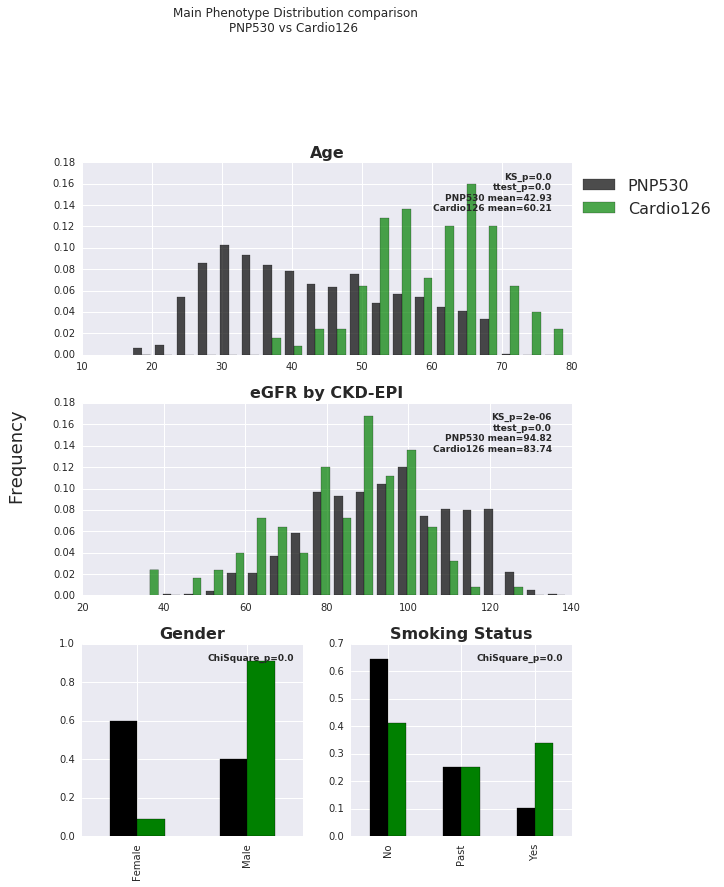

figure was saved in folder TCR_real_data/realAnalysis
done


In [10]:
numericalphenotypes=['Age','eGFR by CKD-EPI']
categoricalphenotypes=['Gender', 'Smoking Status']

f1='%s/TCR_real_data/NewPhenotypicData/newPhenotypesPNPAllInfo_withDummies.xlsx' %MyPath
PNP530_phen_new_dummies=pd.read_excel(f1)
phenotypeDF1=PNP530_phen_new_dummies.set_index('BD')

f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx' %MyPath
Cardio126_phen_new_dummies=pd.read_excel(f2)
phenotypeDF2=Cardio126_phen_new_dummies.set_index('BD')
sampleList1=None
sampleList2=None
sampleListName1=None
sampleListName2=None

datasetName1='PNP530'
datasetName2='Cardio126'
nBins=20

fig1=compare_phenotypes(numericalphenotypes,categoricalphenotypes,nBins,phenotypeDF1,sampleList1,sampleListName1,datasetName1,
                       phenotypeDF2,sampleList2,sampleListName2,datasetName2)

folderToSave='%s/TCR_real_data/NewPhenotypicData/phenotypeComparisons' %MyPath
phenotypes=''.join(numericalphenotypes+categoricalphenotypes)
if not isdir(folderToSave):
    makedirs(folderToSave)
fig1.savefig('%s/%s_%s_%s' %(folderToSave,phenotypes,datasetName1,datasetName2),dpi=300)

# compare public sequence identities between the full cohorts:

function comparePublicSeqIdentities and its helper function addSeqIdentitiesAndPlotPie were copied to publicSeqAnalysis.py

## new run - 190918 - with popped files

step 1: collecting public sequence rates per sample in each dataset...
0
dataset Name=PNP530
dataset file=/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data
dataset sampleList=None
TCRdf percent shared is 5
removing samples that have relatives in PNP530
n samples before removal=530
n samples after removal=434
step 2: generating merged public DF...
sharing analysis folder is called *sharing analysis*
555801
step 1: collecting public sequence rates per sample in each dataset...
1
dataset Name=Cardio126
dataset file=/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples
dataset sampleList=None
TCRdf percent shared is 5
removing samples that have relatives in PNP530
n samples before removal=126
n samples after removal=126
step 2: generating merged public DF...
sharing analysis folder is called *sharing analysis*
63118
merged public list length length=570462
step 3: plotting public rates per samples for all datasets...


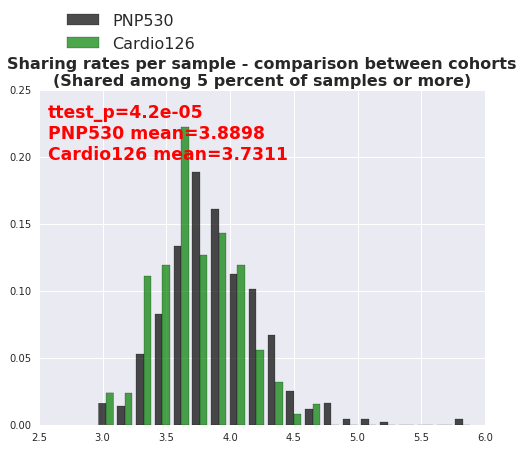

step 4: find  sequences that are public in all datasets, add identities and plot pie diagram...
number of sequence shared by 2 or more samples in publicAll: 48457 (8.49434318149 perc)
thresholdToOther is 0.04, total counts=48635, final threshold for chi square is 1945.4
step 5: find sequences that are public only in one dataset, add identities, save files and plot pie diagram...
number of sequence shared by 2 or more samples in publicOnlyInPNP530: 507344 (88.935634626 perc)
thresholdToOther is 0.04, total counts=507406, final threshold for chi square is 20296.24
calculating chi square test comparing publicOnlyInPNP530 to public sequence common to all datasets
        combined annotation_list_clean_x  combined annotation_list_clean_y
count2                                                                    
Other                               1941                              2716
nan                                46694                            504690
number of sequence shared by 2 o

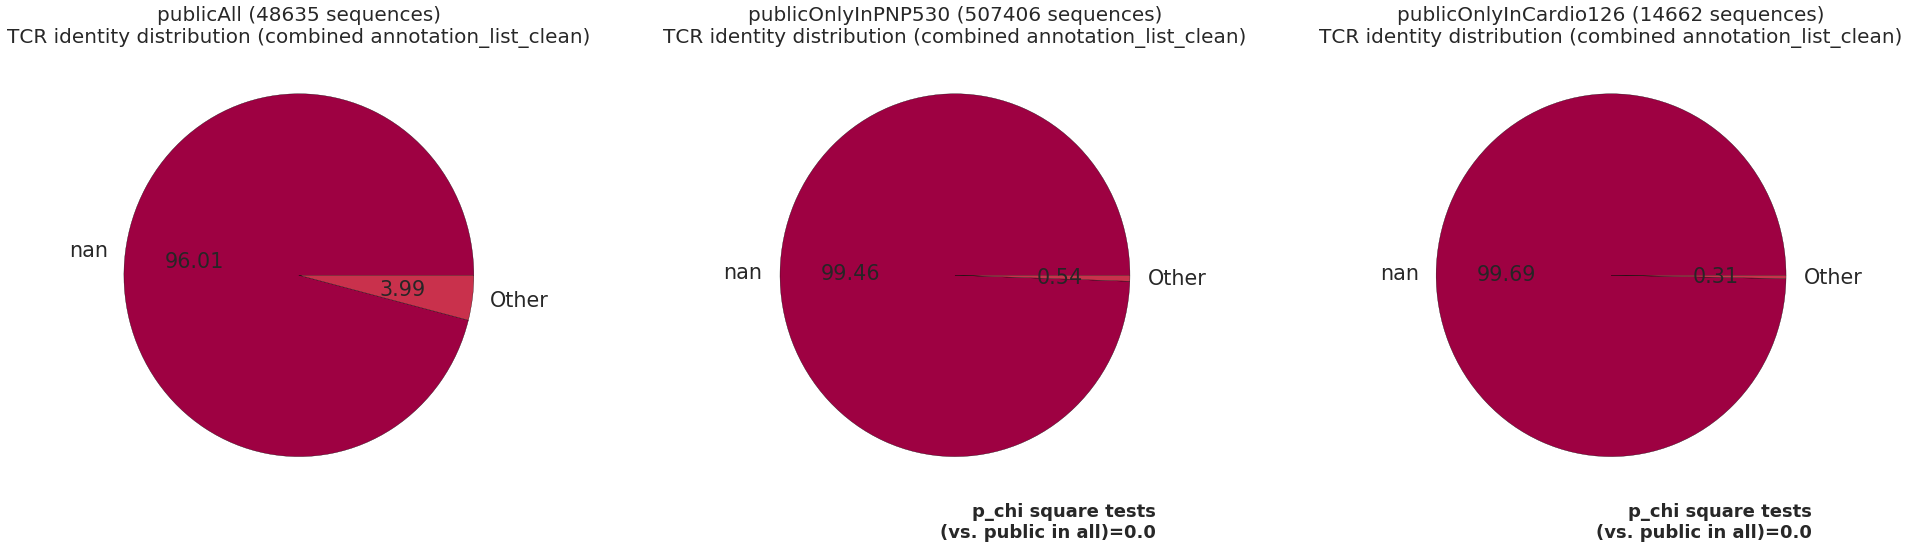

step 7: plotting venn diagrams...
plotting venn diagram for two groups:


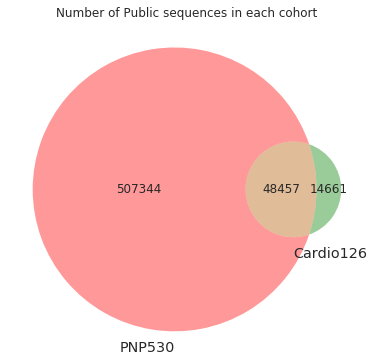

end of function!!


In [4]:
plt.show()
datasetName1='PNP530'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='combined annotation_list_clean'
dropnaFromIdentitiesPie=False

identityFile='%s/TCR CDR3 sequence databases/combined annotation_list_clean_popped.xlsx' %MyPath
identityDF=pd.read_excel(identityFile)
identityDFname='popped'
thresholdToOther=0.04
nSharedMin=2
RemoveSamplesWithRelative=True


datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,None),(datasetName2, datasetFolder2,TCRdfPercShared2,None)]

comparePublicSeqIdentities(datasetList,identityColumnForPie,identityDF=identityDF,identityDFname=identityDFname,
               thresholdToOther=thresholdToOther,nSharedMin=nSharedMin,dropnaFromIdentitiesPie=dropnaFromIdentitiesPie,RemoveSamplesWithRelative=RemoveSamplesWithRelative)

In [ ]:
#### fig = plt.figure(1, figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.title('Raining Hogs and Dogs')

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15,30,45, 10]

patches, texts, autotexts = ax.pie(fracs, labels=labels, autopct='%1.1f%%')
# for a in autotexts:
#         a.set_size('xx-large')
for t in texts:
    t.set_size('xx-large')
plt.show()

In [ ]:
plt.show()
datasetName1='PNP530'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='Epitopespecies_VDJDB'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,None),(datasetName2, datasetFolder2,TCRdfPercShared2,None)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

In [ ]:
d1={'a':1,'b':2}
for k,v in d1.items():
    print k,v

# predictions in the full cohort:

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

ss=None
repeat=None
genFeatureDF=True
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=PNP530+Cardio126
sampleListName='PNP530Cardio126'
print len(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,sampleListName,genFeatureDF)
 

### get DFs:

In [ ]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=PNP530+Cardio126
sampleListName='PNP530Cardio126'
percShared=10

# phenotype df:
PNPphenotypeFile='%s/TCR_real_data/NewPhenotypicData/PNP530_phen_new_dummies.xlsx' %MyPath
PNPphenotypeDF=pd.read_excel(PNPphenotypeFile)

CardiophenotypeFile='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %MyPath
CardiophenotypeDF=pd.read_excel(CardiophenotypeFile)

PNP530Cardio126PhenotypeFile='%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/PNP530Cardio126_phen_new_withDummies.xlsx' %MyPath
combinedPhenotypeDF=pd.concat([PNPphenotypeDF,CardiophenotypeDF])
combinedPhenotypeDF=combinedPhenotypeDF.set_index('BD')
print len(combinedPhenotypeDF)
print combinedPhenotypeDF.iloc[:4,:4]
combinedPhenotypeDF.to_excel(PNP530Cardio126PhenotypeFile)

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/TCR_real_data/PNP530Cardio126Combined/sharingAnalysis' %MyPath
TCRdfName='sharingMatrix_PNP530Cardio126_minNshared5_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %percShared
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - without highly correlated columns...'
featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126_filteredByPNP530Cardio126_allFeatures_\
noCorrelated' %MyPath
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run predictions:

In [ ]:
datasetName='PNP530Cardio126'

featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
# featureComposition_list=['phenotypesOnly']
for featureComposition in featureComposition_list:
    
    if featureComposition=='phenotypesOnly':
        kList=[10]
    else:
        kList=[10,25,40,50,60,70,100,120,150,170,250,300]    
    for k in kList:

        modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                   (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                   (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
             'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

        for modelAndParams in modelAndParams_list:
            model=modelAndParams[0]
            modelName=modelAndParams[1]
            model_params=modelAndParams[2] 

            if model==LogisticRegression:
                featureSelectionMethod_list=[f_classif,'random']
            else:
                featureSelectionMethod_list=[f_classif,'random','usingModel']
            if featureComposition=='phenotypesOnly':
                featureSelectionMethod_list=[None]
            for featureSelectionMethod in featureSelectionMethod_list:

                XName='%s_%s' %(datasetName,featureComposition)
                if featureComposition=='phenotypesOnly':
                    useTCRfeatures=False #True/False
                    usePCAdf=False #True/False
                    useTCRdf=False #True/False   
                elif featureComposition=='phenotypes&PCA&TCRfeatures':
                    useTCRfeatures=True #True/False
                    usePCAdf=True #True/False
                    useTCRdf=False #True/False
                elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
                    useTCRfeatures=True #True/False
                    usePCAdf=True #True/False
                    useTCRdf=True #True/False
                print '******featureComposition=%s, k=%s,modelAndParams=%s,featureSelectionMethod=%s********' %(featureComposition,
                                                        k,modelAndParams,featureSelectionMethod)

                # (1) general definitions:
                datasetType='PNP_Cardio' #PNP/PNP_Cardio

                #(2) model definitions:
                ResultFolder='%s/TCR_real_data/CardioSamples/Predictions3' %MyPath
                if not isdir(ResultFolder):
                    makedirs(ResultFolder)

                n_splits=20
                useCV=True
                stratifiedCV=True

                # (5) phenotypeDF:

                genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                phenotypeDF=combinedPhenotypeDF
                phenotypeDFname='newSmall' #('small','allNum and more- see step #6.2

                #(3) target definition:
                targetDF=pd.DataFrame(index=['BD'+str(x) for x in range(1,1100)])
                targetDF['isCardio']=np.where(targetDF.index.str.replace('BD','').astype(int)>949,1,0)
                targetName='isCardio'
                YName=targetName
                print 'target value counts:'
                print targetDF[targetName].value_counts(dropna=False)

                #  (4) feature composition:
                usePhenotype=True #True/False

                # (6) TCRdf:
                datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
                datasetNameTCRdf=datasetName  
                TCRdfName='sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                TCRdf=TCRdf

                #(7) PCAdf (based on the TCRdf selected)
                n_comp=100 # int or None 
                isSparse=True #True/False

                #(8) TCRfeatures:
                getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                TCRfeatureDF=TCRfeatureDF2

                sampleList=sampleList
                sampleListName='Cardio126'

                filterFeaturesByCorr=None #None or float between 0 and 1
                featureSelectionUsingModel=False # True/False
        #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
        #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
        #             k=150 #None (will be set to 50 / int - defines number of k best))
                scale=True

                predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                      stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                      YName,targetDF,
                                      genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                      datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                      getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                      filterFeaturesByCorr,featureSelectionMethod,scale,
                                      k,cdate=cdate,overwriteResults=True)


print 'done with all iterations...'

### explore prediction results:

#### get results:

In [ ]:
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
YName='isCardio'

for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions3/%s_predictions/%s' %(MyPath,YName,modelName)
    df_folder='%s/predictionDFs' %folder
    print folder
    results=concat_summarizing_dfs_excel(df_folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)
    
    


#### plot results:

In [ ]:
YName='isCardio'
datasetName='PNP530Cardio126'
ss=None
repeat=None


# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.7,1)),('pr_auc_corrected',(0.4,0.6))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
        
        filedate='25082018'
#         filedate=cdate ##### DONT FORGET TO CHANGE!!!!!!!
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,ax1=plt.subplots(figsize=(16,9))
    #     
        print count
        count=count+1
        ss=None
        repeat=None
#         title='%s_%s_%s' %(YName,datasetName,featureSelectionMethod)
        title=''
        filterCrit=featureSelectionMethod
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=(0,300),ylim=ylim,filedate=filedate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit,datasetName=datasetName,YName=YName)

        ax1.legend(fontsize=14,bbox_to_anchor=(-0.05, 1))

        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.35)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/%s_predictions' %(resultFolder,YName)
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'




# run permanova and mantel for phenotypes vs. other features not just TCRdf

In [ ]:
def testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio,compareTCRfeatures=True,
                                           genPhenDistMat=True,genFeatDistMat=True,genTCRdfDistMat=True):

    
    # (0) definitions:
    #load sample lists:
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
        PNP530=pickle.load(fp)
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
        Cardio126=pickle.load(fp)
        
    if ss is None:
        partialDatasetFolderPNP='TCR_real_data' 
        datasetNamePNP='PNP530'
        partialDatasetFolderCardio='TCR_real_data/CardioSamples' 
        datasetNameCardio='Cardio126'
    else:
        partialDatasetFolderPNP='TCR_real_data/PNP530_SubSampled%sdata_rep%s' %(ss,repeat)
        datasetNamePNP='PNP530_ss%s_rep%s' %(ss,repeat)
        partialDatasetFolderCardio='TCR_real_data/CardioSamples/Cardio126_SubSampled%sdata_rep%s' %(ss,repeat) 
        datasetNameCardio='Cardio126_ss%s_rep%s' %(ss,repeat)

    datasetFolderPNP='%s/%s' %(MyPath,partialDatasetFolderPNP)
    datasetFolderCardio='%s/%s' %(MyPath,partialDatasetFolderCardio)
    data_folder1=partialDatasetFolderPNP
    data_folder2=partialDatasetFolderCardio
    datasetName1=datasetNamePNP
    datasetName2=datasetNameCardio
    TakeSameSamples=False
    filteringList1=None
    filteringList2=None
    filteringList1Name=None
    filteringList2Name=None
    plotType='bar'
    featureList=['normSeqNums_per2000_NT_T','frequencyCount (%)_max_T','frequencyCount (%)_mean_T','shannon_nt_T',
                 'cdr3Length_mean_T','n1Insertion_mean_T','n2Insertion_mean_T']
    
    # (1) subsample PNP and Cardio:
    if ssPNP: 
        print '********subsampling PNP530 cohort with %s sequences per sample:***********'
        nTemplates=ss
        repeat=repeat 
        datasetName='PNP530' 
        fullSamplesFolder='%s/TCR_real_data/SamplesForAnalysis_corrected' %MyPath 
        data_folder_full='TCR_real_data' #change if necessary
        TakeSameSamples=True
        subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,
                                          TakeSameSamples=TakeSameSamples)
    if ssCardio: 
        print '*********subsampling Cardio cohort with %s sequences per sample:***************'
        nTemplates=ss
        repeat=repeat 
        datasetName='Cardio126' 
        fullSamplesFolder='%s/TCR_real_data/CardioSamples/SamplesForAnalysis_corrected' %MyPath 
        data_folder_full='TCR_real_data/CardioSamples' #change if necessary
        TakeSameSamples=True
        subsampling_and_featureExtraction(fullSamplesFolder,nTemplates,repeat,datasetName,data_folder_full,
                                          TakeSameSamples=TakeSameSamples)
        

    

    # compare TCRfeatures between ss cohorts:
    if compareTCRfeatures:
        print '************comparing TCRfeatures between cohorts (not matched!):*************'
        compare_features_between_datasets(data_folder1, datasetName1,  data_folder2, datasetName2,TakeSameSamples, 
                                      filteringList1,filteringList2,filteringList1Name,filteringList2Name)
        plot_gene_usage_comparison(data_folder1, datasetName1,  data_folder2, datasetName2,plotType,TakeSameSamples, 
                                          filteringList1,filteringList2,filteringList1Name,filteringList2Name)

    
    # (2) produce TCRdfs to use with permanova/mantel:
    if genTCRdfPNP:
        print '*****generating 10perc TCRdfs******'
        DFtype='TCR'
        genDF=True #False=generate new df
        toBinary=True
        mbLevel='g'
        useShortName=True
        datasetFolder='%s/%s' %(MyPath,data_folder1)
        datasetName=datasetName1
        minVal=None    #minVal can be None,0, float, or 'dfMinVal' or dfMinVal2:
        minSharedT=None #minimal number of samples shared by seq/species required to leave sample in the database (int or None)
        percShared=10 #minimal number of samples shared by seq/species required to leave sample in the database (int [ percentage]
                        #or None)
        removeOutliers=True
        normData=True
        logTransform=True
        extractUniqueAA=True # use True when this is the first time to analyze this dataset, otherwise, use False
        minNshared=2
        onlyProductive=True
        mbDataFolder='AllSeqProjects'
        PNP530Cardio126list=PNP530+Cardio126
        SampleList=PNP530
        SampleListName='PNP530'
        libPrepMethod=None
        filterGenotek=True
        filterMinimalReads=9000000
        filterlibPrepMethod=libPrepMethod
        groupFunction='noOutlierMean'
        nSTD=5
        nMinSamples=3
        ignoreNotSameYear=True
        removeSamePerson=False
    
        df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                         minVal,minSharedT,percShared,
                                         mbLevel,useShortName,datasetFolder,datasetName,extractUniqueAA,
                                        minNshared,onlyProductive,mbDataFolder,SampleList,
                                          SampleListName,filterlibPrepMethod,filterGenotek, 
                                          groupFunction, nSTD, nMinSamples, ignoreNotSameYear, removeSamePerson)
    if genTCRdfCardio:
        print '***********generating 10perc TCRdfs for Cardio************'
        datasetFolder='%s/%s' %(MyPath,data_folder2)
        datasetName=datasetName2
        SampleList=Cardio126
        SampleListName='Cardio126'
    
        df=genTCRorMBdfWithManipulations(DFtype,genDF,toBinary,removeOutliers,normData,logTransform,
                                         minVal,minSharedT,percShared,
                                         mbLevel,useShortName,datasetFolder,datasetName,extractUniqueAA,
                                        minNshared,onlyProductive,mbDataFolder,SampleList,
                                          SampleListName,filterlibPrepMethod,filterGenotek, 
                                          groupFunction, nSTD, nMinSamples, ignoreNotSameYear, removeSamePerson)
        
    #(3) run permanova and mantel to test which phenotype are associated with TCRdf structure
    #load PNP phenotypeDF:
    f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/newPhenotypesPNPAllInfo_withDummies.xlsx'
    PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')
    
    #load Cardio phenotypeDF:
    f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx'
    Cardio126_phen_new_dummies=pd.read_excel(f1).set_index('BD')
    
    numericalphenotypesPNP=['Age','BMI','WBC','eGFR by CKD-EPI','HbA1C','Glucose','HDL','Hemoglobin','AST',
                            'Total Cholesterol']
    numericalphenotypesCardio=['Age','BMI','eGFR by CKD-EPI','WBC','LDL','HDL','Triglycerides','CRP','HbA1C','PLT',
                               'Hemoglobin','Initial CPK','Maximal CPK','LDH','AST','Glucose','Initial Troponin',
                               'Maximal Troponin','Total Cholesterol','GRACE Score','Admission Systolic BP',
                               'Admission Diastolic BP','Admission Pulse Rate','Admission Saturation Value',
                               'Admission Temperature']
    categoricalphenotypesPNP=['Gender_Male','Smoking Status_Past','Smoking Status_Yes']
    categoricalphenotypesCardio=['Gender_Male','Smoking Status_Past','Smoking Status_Yes','LVEFmapped','PreviousPCImapped_1',
            'PreviousPCImapped_2+','Hypertension','Dyslipidemia',
           'Microvascular Complications','Previous CABG','Known CAD','PCI_binary','Religion','PVD',
           'Glucose Disorder_DM2','Glucose Disorder_No','Glucose Disorder_PreDM','Admission Diagnosis_NSTEMI',
           'Admission Diagnosis_STEMI',
           'Admission Statins','Chief Complaint_anginal pain','Chief Complaint_atypical pain','Chief Complaint_dyspnea']
  
    
    
    numMetric='euclidean'
    catMetric='jaccard'
    
    #define parameters:
    
    featureDFfile='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126_filteredByPNP530Cardio126\
_allFeatures_noCorrelated_noConsts_filledna' %MyPath
    TCRfeatureDF2=pd.read_pickle(featureDFfile)

    PNP530featureDF=TCRfeatureDF2.loc[PNP530,:]
    Cardio126featureDF=TCRfeatureDF2.loc[Cardio126,:]
    datasetList=['PNP530','Cardio126']
    for dataset in datasetList: 
        if 'PNP' in dataset: #DEFINE RELEVANT DATASET FOLDER, NAME AND PHENOTYPE DF FILE
            print 'generating distmats for PNP'
            datasetFolder='%s/%s' %(MyPath,data_folder1)
            datasetName=datasetName1
            phenotypeDF=PNP530_phen_new_dummies
            categoricalphenotypes=categoricalphenotypesPNP
            numericalphenotypes=numericalphenotypesPNP
            SampleListName='PNP530'
            featureDF=PNP530featureDF
        elif 'Cardio' in dataset: #DEFINE RELEVANT DATASET FOLDER, NAME AND PHENOTYPE DF FILE
            print 'generating distmats for Cardio'
            datasetFolder='%s/%s' %(MyPath,data_folder2)
            datasetName=datasetName2
            phenotypeDF=Cardio126_phen_new_dummies
            categoricalphenotypes=categoricalphenotypesCardio
            numericalphenotypes=numericalphenotypesCardio
            SampleListName='Cardio126'
            featureDF=Cardio126featureDF
            
        print '****************generating phenotype distMats*******************'
        if genPhenDistMat:
            distMatFolder='%s/phenDistMats' %datasetFolder
            if not isdir(distMatFolder):
                makedirs(distMatFolder)
            for n,phenotype in enumerate(numericalphenotypes):
                metric='euclidean'
                print 'generating distMat for phenotype %s' %phenotype

                df=pd.DataFrame(phenotypeDF[phenotype])
                df_condensed_org, distMat_square=genDistMat(df,metric)

                if ss is None:
                    distMatFileSquare='%s/%s_%s_%s_distMat' %(distMatFolder,dataset,phenotype,metric)
                    distMatFileCondensed='%s/%s_%s_%s_distMat_CONDENSED' %(distMatFolder,dataset,phenotype,metric)
                else:
                    distMatFileSquare='%s/%sss%s_rep%s_%s_%s_distMat' %(distMatFolder,dataset,ss,repeat,phenotype,metric)
                    distMatFileCondensed='%s/%sss%s_rep%s_%s_%s_distMat_CONDENSED' %(distMatFolder,dataset,ss,repeat,phenotype,metric)                 
                distMat_square.to_pickle(distMatFileSquare)
                df_condensed_org.to_pickle(distMatFileCondensed)
            
        print '****************generating feature distMats*******************'
        if genFeatDistMat:
            distMatFolder='%s/featureDistMats' %datasetFolder
            if not isdir(distMatFolder):
                makedirs(distMatFolder)
            for n,feature in enumerate(featureList):
                metric='euclidean'
                print 'generating distMat for feature %s' %feature

                df=pd.DataFrame(featureDF[feature])
                df=df[df[feature].notnull()]
                df_condensed_org, distMat_square=genDistMat(df,metric)

                if ss is None:
                    distMatFileSquare='%s/%s_%s_%s_distMat' %(distMatFolder,dataset,feature,metric)
                    distMatFileCondensed='%s/%s_%s_%s_distMat_CONDENSED' %(distMatFolder,dataset,feature,metric)
                else:
                    distMatFileSquare='%s/%sss%s_rep%s_%s_%s_distMat' %(distMatFolder,dataset,ss,repeat,feature,metric)
                    distMatFileCondensed='%s/%sss%s_rep%s_%s_%s_distMat_CONDENSED' %(distMatFolder,dataset,ss,repeat,feature,metric)                 
                distMat_square.to_pickle(distMatFileSquare)
                df_condensed_org.to_pickle(distMatFileCondensed)
        
        
        ### generating TCRdf 
        if ss is None:
            if dataset=='PNP':
                TCRdfName='sharingMatrix_%s_minNshared5_RA_onlyProductiveTrue__percShared10_OLtrimmed' %dataset
            else:
                TCRdfName='sharingMatrix_%s_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed' %dataset                
        else:  
            TCRdfName='sharingMatrix_%s_ss%s_rep%s_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed' %(dataset,ss,repeat)
        
        
        print '******generating distMat for TCRdfs:**********'  
        if genTCRdfDistMat:
            distMatFolder='%s/distanceMatrices' %datasetFolder
            if not isdir(distMatFolder):
                makedirs(distMatFolder)
            TCRdfnewName=TCRdfName.replace('sharingMatrix_','TCRdf')
            TCRdfnewName=TCRdfnewName.replace(datasetName,'')
            TCRdfnewName=TCRdfnewName.replace('_','')
            print (TCRdfnewName)
            print 'generating distance matrix for RA data:'
            print 'sampleListName=%s' %SampleListName
            try:
                file1='%s/%s_sharingAnalysis/%s' %(datasetFolder, SampleListName,TCRdfName)
                print 'file name=%s' %file1
                TCRdf=pd.read_pickle(file1)
            except:
                try:
                    file1='%s/sharingAnalysis/%s' %(datasetFolder, TCRdfName)
                    print 'still trying...'
                    print 'file name=%s' %file1
                    TCRdf=pd.read_pickle(file1)
                except:
                    print 'couldnt load TCRdf'

            metric1='braycurtis'
            print 'TCRdf sum is %s' %TCRdf.sum().sum()
            distMatFileSquare='%s/%s_%s_distMat' %(distMatFolder,TCRdfnewName,metric1)
            distMatFileCondensed='%s/%s_%s_distMat_CONDENSED' %(distMatFolder,TCRdfnewName,metric1)
            df_condensed_org, distMat_square=genDistMat(TCRdf,metric1)
            print 'distMat_square sum is %s' %distMat_square.sum().sum()
            distMat_square.to_pickle(distMatFileSquare)
            df_condensed_org.to_pickle(distMatFileCondensed)  

            print 'generating distance matrix for binary data:'
            TCRdfName_binary=TCRdfName+'_binary'
            TCRdfnewName_binary=TCRdfnewName+'_binary'

            try:
                file2='%s/%s_sharingAnalysis/%s' %(datasetFolder, SampleListName,TCRdfName_binary)
                print 'file name=%s' %file2
                TCRdf_binary=pd.read_pickle(file2)
            except:
                try:
    #                 print 'still trying...'
    #                 print 'sampleListName=%s' %SampleListName
                    file2='%s/sharingAnalysis/%s' %(datasetFolder, TCRdfName_binary)
                    print 'still trying...'
                    print 'file name=%s' %file2
                    TCRdf_binary=pd.read_pickle(file2)
                except:
                    print 'couldnt load TCRdf'

            metric2='jaccard'
            distMatFileSquare_binary='%s/%s_%s_distMat' %(distMatFolder,TCRdfnewName_binary,metric2)
            distMatFileCondensed_binary='%s/%s_%s_distMat_CONDENSED' %(distMatFolder,TCRdfnewName_binary,metric2)
            df_condensed_org_binary, distMat_square_binary=genDistMat(TCRdf_binary,metric2)
            distMat_square_binary.to_pickle(distMatFileSquare_binary)
            df_condensed_org_binary.to_pickle(distMatFileCondensed_binary) 
    
        print '******done with distance matrices******'
    
        permanovaDFfolder='%s/TCR_phenotype_relations/permanovaDFs' %datasetFolder
        if not isdir(permanovaDFfolder):
            makedirs(permanovaDFfolder)
                                                                                                            
        TCRdistMatFolder='%s/distanceMatrices' %datasetFolder
#         TCRdistMatNameList=[f for f in listdir(TCRdistMatFolder) if isfile(join(TCRdistMatFolder,f))]
#         TCRdistMatNameList=[f for f in TCRdistMatNameList if '_CONDENSED' not in f]
#         print 'number of distMats to analyze in folder is %s' %len(TCRdistMatNameList)
        TCRdistMatNameList=['TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_binary_jaccard_distMat',
                            'TCRdfminNshared2RAonlyProductiveTruepercShared10OLtrimmed_braycurtis_distMat']
        for phenotype in categoricalphenotypes:
            print phenotype
            for TCRdistMatName in TCRdistMatNameList:
                nPerm=99
                removeSameUser=True
                print TCRdistMatName
                TCRdistMat=pd.read_pickle(join(TCRdistMatFolder,TCRdistMatName))
    
                print 'TCRdistMat head:'
                print TCRdistMat.iloc[:5,:5]
                newName=TCRdistMatName.replace('minNshared2RAonlyProductiveTrue','')
                phenotypeDF=phenotypeDF[phenotypeDF[phenotype].notnull()]
                print 'phenotype head:'
                print phenotypeDF[phenotype].head()
                print 'conducting permanova'
                permAnovaResDF=permanova_withWrapper(TCRdistMat,newName,phenotypeDF,phenotype, 
                                             nPerm,removeSameUser,permanovaDFfolder)
                try:
                    if permAnovaResDF.loc[0,'p']<0.05:
                        print 'repeating permanova for phenotype %s with 9999 permutations' %phenotype
                        nPerm=9999
                        permAnovaResDF=permanova_withWrapper(TCRdistMat,newName,phenotypeDF,phenotype, 
                                                 nPerm,removeSameUser,permanovaDFfolder)
                      
                except:
                    pass
                
            for feature in featureList:
                nPerm=99
                removeSameUser=True
#                 print feature
                metric='euclidean'
                distMatFolder='%s/featureDistMats' %datasetFolder
                distMatFileSquare='%s/%s_%s_%s_distMat' %(distMatFolder,dataset,feature,metric)
                featuredistMat=pd.read_pickle(distMatFileSquare)
    
                print 'featuredistMat head:'
                print featuredistMat.iloc[:5,:5]
                print 'conducting permanova for feature %s and phenotype %s' %(feature, phenotype)
                permAnovaResDF=permanova_withWrapper(featuredistMat,feature,phenotypeDF,phenotype, 
                                             nPerm,removeSameUser,permanovaDFfolder)
                try:
                    if permAnovaResDF.loc[0,'p']<0.05:
                        print 'repeating permanova for feature %s and feature %s with 9999 permutations' %(phenotype,
                                                                                                           feature)
                        nPerm=9999
                        permAnovaResDF=permanova_withWrapper(featuredistMat,feature,phenotypeDF,phenotype,
                                             nPerm,removeSameUser,permanovaDFfolder)
                except:
                    pass
                
    
        print '****get PERMANOVA RESULTS FOR %s*****' %dataset                                                                                            
        dfs_folder=permanovaDFfolder
        PermanovaResults1=concat_summarizing_dfs(dfs_folder)
        nTests=len(PermanovaResults1)
        PermanovaResults1=PermanovaResults1.sort_values(by='p')
        PermanovaResults1=add_corrected_pValues(PermanovaResults1,pValueColumn='p',nTests=nTests,FDR=0.1)
        PermanovaResults1['cohort']=dataset
        print PermanovaResults1
        permanovaResultFile='%s/TCR_phenotype_relations/phenotype_TCRdf_permanovaResults.xlsx' %datasetFolder
        PermanovaResults1.to_excel(permanovaResultFile)   
                                                                                                            
        print '******performing mantel test now, still with dataset %s******' %dataset
        mantelDFfolder='%s/TCR_phenotype_relations/mantelDFs' %datasetFolder
        if not isdir(mantelDFfolder):
            makedirs(mantelDFfolder)
        for phenotype in numericalphenotypes:
            nPerm=99
            method='spearman'
            alternative='greater'
            removeSameUser=True
                                                                                                            
            phenotypedistMatFolder='%s/phenDistMats' %datasetFolder
            if ss is None:
                phenotypedistMatName='%s_%s_euclidean_distMat' %(dataset,phenotype)
            else:
                phenotypedistMatName='%sss%s_%s_rep%s_euclidean_distMat' %(dataset,ss,repeat,phenotype)
            phenotype_distMat=pd.read_pickle('%s/%s' %(phenotypedistMatFolder,phenotypedistMatName))
    
            TCRdistMatFolder='%s/distanceMatrices' %datasetFolder
            TCRdistMatNameList=[f for f in listdir(TCRdistMatFolder) if isfile(join(TCRdistMatFolder,f))]
            TCRdistMatNameList=[f for f in TCRdistMatNameList if '_CONDENSED' not in f]
    
            print 'number of TCR distMats to analyze in folder is %s' %len(TCRdistMatNameList)
            for TCRdistMatName in TCRdistMatNameList:
                nPerm=99
                print 'conducting mantel test for %s in %s' %(phenotype,dataset) 
                TCR_distMat=pd.read_pickle(join(TCRdistMatFolder,TCRdistMatName))
                newName=TCRdistMatName.replace('minNshared2RAonlyProductiveTrue','')
                feature_distMat=TCR_distMat
                feature_name=newName
                phenotype_name=phenotypedistMatName
                mantelResDF=mantel_withWrapper(feature_distMat,feature_name,phenotype_distMat,phenotype_name, mantelDFfolder, 
                                       nPerm,method,alternative, removeSameUser, i=None,j=None)                                                                                            
                try:
                    if mantelResDF.loc[0,'p']<0.05:
                        print 'repeating mantel for phenotype %s with 9999 permutations' %phenotype
                        nPerm=9999
                        mantel_withWrapper(feature_distMat,feature_name,phenotype_distMat,phenotype_name, mantelDFfolder, 
                                           nPerm,method,alternative, removeSameUser, i=None,j=None)
                except:
                    pass
                
                
            for feature in featureList:
                print 'conducting mantel test for phenotype %s and feature %s in %s' %(phenotype,feature,dataset) 
                distMatFolder='%s/featureDistMats' %datasetFolder
                distMatFileSquare='%s/%s_%s_%s_distMat' %(distMatFolder,dataset,feature,metric)
                featuredistMat=pd.read_pickle(distMatFileSquare)
                phenotype_name=phenotypedistMatName
                mantelResDF=mantel_withWrapper(featuredistMat,feature,phenotype_distMat,phenotype_name, mantelDFfolder, 
                                       nPerm,method,alternative, removeSameUser, i=None,j=None)                                                                                            
                try:
                    if mantelResDF.loc[0,'p']<0.05:
                        print 'repeating mantel for phenotype %s and feature %s in %s with 9999 permutations' %(phenotype,feature,dataset)
                        nPerm=9999
                        mantel_withWrapper(featuredistMat,feature,phenotype_distMat,phenotype_name, mantelDFfolder, 
                                       nPerm,method,alternative, removeSameUser, i=None,j=None)
                except:
                    pass
    
        print 'getting results for mantel tests:'    
        mantelResults1=concat_summarizing_dfs(mantelDFfolder)
        nTests=len(mantelResults1)
        mantelResults1=mantelResults1.sort_values(by='p')
        mantelResults1=add_corrected_pValues(mantelResults1,pValueColumn='p',nTests=nTests,FDR=0.1)
        f1='%s/TCR_phenotype_relations/phenotype_TCRdf_mantelResults.xlsx' %datasetFolder
        mantelResults1.to_excel(f1)
        print mantelResults1


print 'end of function!!!' 

In [ ]:
ss=None
repeat=None
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio,compareTCRfeatures=True,
                                           genPhenDistMat=False,genFeatDistMat=True,genTCRdfDistMat=False)

## plotting correlations:

In [ ]:
#get relevant phenotypes:
f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/NewPhenotypicData/newPhenotypesPNPAllInfo_withDummies.xlsx'
PNP530_phen_new_dummies=pd.read_excel(f1).set_index('BD')
corr_phens=PNP530_phen_new_dummies[['Age','BMI','Total Cholesterol','HbA1C','Glucose']]
print corr_phens.head()

#get relevant features:
featureDFfile='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126_filteredByPNP530Cardio126\
_allFeatures_noCorrelated_noConsts_filledna' %MyPath
TCRfeatureDF2=pd.read_pickle(featureDFfile)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
        PNP530=pickle.load(fp)
PNP530featureDF=TCRfeatureDF2.loc[PNP530,:]
corr_feats=PNP530featureDF[['normSeqNums_per2000_NT_T','frequencyCount (%)_max_T','frequencyCount (%)_mean_T',
                            'shannon_nt_T','cdr3Length_mean_T','n1Insertion_mean_T']]
print corr_feats.head()

#merge:
corr_phens_feats=pd.merge(corr_phens,corr_feats,how='inner',left_index=True,right_index=True)
print corr_phens_feats.head()
print len(corr_phens_feats)
print len(corr_phens)
print len(corr_feats)

In [ ]:
corr_phens_feats.corr()

In [ ]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_vals=calculate_pvalues(corr_phens_feats)
p_vals

In [ ]:
#find sig with bonferroni corrections:
nTests=10+9+8+7+7+5+4+3+2+1
print nTests
pCut=0.05/56
bonff_corr_phens_feats=p_vals.where(p_vals<pCut)
bonff_corr_phens_feats

In [ ]:
sns.pairplot(corr_phens_feats,dropna=True,diag_kind='kde')
plt.show()